In [1]:
# import sys - [Explanation of what this line does]
import sys
# sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/') - [Explanation of what this line does]
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/')

# from import_data import * - [Explanation of what this line does]
from import_data import *
# from import_subtypes import * - [Explanation of what this line does]
from import_subtypes import *

CBCL: cbcl_base_t, cbcl_base_factors 
fMRI nback: nback
SST: sst
NIH: pcs
Stroop Behavioral: stroop
Matrix: Reasoning
All demos: demos_baseline
UPPS Factors: upps_factors
Cognitive: cog_all
COG EF Factors: cog_ef_factors
Resting State Include: sample1_rest_include, sample2_rest_include, full_sample_rest_include /n sample1_rest_include_idsub, sample2_rest_include_idsub, sample2_rest_idsub, full_sample_rest_include_idsub
Resting State Combined: sample1_rest_combined, sample2_rest_combined, full_sample_rest_combined /n sample1_rest_combined_idsub, sample2_rest_combined_idsub, full_sample_rest_combined_idsub
Resting State Dont Include: full_sample_rest_dont_include /n full_sample_rest_dont_include_idsub


In [4]:
# full_sample_rest_dont_include.shape - [Explanation of what this line does]
full_sample_rest_dont_include.shape

(1293, 340)

In [2]:
# beh_remove = [ - [Explanation of what this line does]
beh_remove = [
    #'withdrawn_depressed_r', 'somatic_complaints_r', 'anxious_depressed_r', 'rule_breaking_r', 
    #'agressive_r', 'attention_problems_r', 'thought_problems_r', 'social_problems_r', 
# 'int_factor', 'ext_factor', 'p_factor' - [Explanation of what this line does]
    'int_factor', 'ext_factor', 'p_factor'
    #'total_r', 'internalizing_r', 'externalizing_r'
# ] - [Explanation of what this line does]
             ]

#beh_remove = ['int_factor', 'ext_factor', 'p_factor']

# cog_remove = ['CardSort_r', 'Flanker_r', 'nb_r', 'List_r', 'sst_r', 'nb_r', 'List_r', 'matrix_r', 'PicVocab_r', 'Reading_r', 'Picture_r', 'Pattern_r'] - [Explanation of what this line does]
cog_remove = ['CardSort_r', 'Flanker_r', 'nb_r', 'List_r', 'sst_r', 'nb_r', 'List_r', 'matrix_r', 'PicVocab_r', 'Reading_r', 'Picture_r', 'Pattern_r']

# beh_all_names = list(filter(lambda item: item not in beh_remove, beh_all_names)) - [Explanation of what this line does]
beh_all_names = list(filter(lambda item: item not in beh_remove, beh_all_names))
# cog_all_names = list(filter(lambda item: item not in cog_remove, cog_all_names)) - [Explanation of what this line does]
cog_all_names = list(filter(lambda item: item not in cog_remove, cog_all_names))

In [112]:
# def getF(data, var, formula): - [Explanation of what this line does]
def getF(data, var, formula):
    #data[var] = data[var]#.astype('float')
# import re - [Explanation of what this line does]
    import re
# data = data[[var] + re.findall(r'\((.*?)\)', formula)].dropna() - [Explanation of what this line does]
    data = data[[var] + re.findall(r'\((.*?)\)', formula)].dropna()
# model = ols(var + formula, data=data).fit() - [Explanation of what this line does]
    model = ols(var + formula, data=data).fit()
# anova_table = np.array(sm.stats.anova_lm(model, type=2)[['F', 'PR(>F)']])[0] - [Explanation of what this line does]
    anova_table = np.array(sm.stats.anova_lm(model, type=2)[['F', 'PR(>F)']])[0]
# return anova_table - [Explanation of what this line does]
    return anova_table


# def getposthoc(data, var, formula): - [Explanation of what this line does]
def getposthoc(data, var, formula):
# import re - [Explanation of what this line does]
    import re
# data = data[[var] + re.findall(r'\((.*?)\)', formula)].dropna() - [Explanation of what this line does]
    data = data[[var] + re.findall(r'\((.*?)\)', formula)].dropna()
    #data[var] = data[var]#.astype('float')
# model = ols(var + formula, data=data).fit() - [Explanation of what this line does]
    model = ols(var + formula, data=data).fit()
# post_hoc = sp.posthoc_ttest(data, val_col=var, group_col='Subtype', - [Explanation of what this line does]
    post_hoc = sp.posthoc_ttest(data, val_col=var, group_col='Subtype',
# p_adjust='fdr_bh').sort_index().sort_index(axis = 1) - [Explanation of what this line does]
                                p_adjust='fdr_bh').sort_index().sort_index(axis = 1)
# ph = np.array(post_hoc) - [Explanation of what this line does]
    ph = np.array(post_hoc)
# tril = np.triu_indices(len(ph)) - [Explanation of what this line does]
    tril = np.triu_indices(len(ph))
# ph[tril] = np.nan - [Explanation of what this line does]
    ph[tril] = np.nan    
# post_hocsm = pd.DataFrame(ph).melt().dropna().reset_index(drop=True) - [Explanation of what this line does]
    post_hocsm = pd.DataFrame(ph).melt().dropna().reset_index(drop=True)
        
# new_list=[] - [Explanation of what this line does]
    new_list=[]
# y = list(itertools.combinations(list(post_hoc.columns),2)) - [Explanation of what this line does]
    y = list(itertools.combinations(list(post_hoc.columns),2))
# for i in range(len(list(itertools.combinations(list(post_hoc.columns),2)))): - [Explanation of what this line does]
    for i in range(len(list(itertools.combinations(list(post_hoc.columns),2)))):
# combo = str(y[i][0])+ "-"+str(y[i][1]) - [Explanation of what this line does]
        combo = str(y[i][0])+ "-"+str(y[i][1])
# new_list.append(combo) - [Explanation of what this line does]
        new_list.append(combo)

# post_hocsm['variable'] = new_list - [Explanation of what this line does]
    post_hocsm['variable'] = new_list
    #post_hocsm['variable'] = list(itertools.combinations(list(post_hoc.columns),2))
# post_hocsm.columns = ['Group', 'pvalue'] - [Explanation of what this line does]
    post_hocsm.columns = ['Group', 'pvalue']
# post_hocsm = post_hocsm.query('pvalue < .05') - [Explanation of what this line does]
    post_hocsm = post_hocsm.query('pvalue < .05')
    

# final_sig = post_hocsm[['Group']].T - [Explanation of what this line does]
    final_sig = post_hocsm[['Group']].T
# final_sig['Sig_Post'] = final_sig[final_sig.columns[0:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1) - [Explanation of what this line does]
    final_sig['Sig_Post'] = final_sig[final_sig.columns[0:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
# final_sig['var'] = var - [Explanation of what this line does]
    final_sig['var'] = var

# return final_sig[['var', 'Sig_Post']].reset_index(drop=True) - [Explanation of what this line does]
    return final_sig[['var', 'Sig_Post']].reset_index(drop=True)


# def run_anova(data, test_vars, formula): - [Explanation of what this line does]
def run_anova(data, test_vars, formula):
    
# if type(test_vars) == str: - [Explanation of what this line does]
    if type(test_vars) == str:
# f_tests_df = pd.DataFrame(getF(data, test_vars, formula)).T - [Explanation of what this line does]
        f_tests_df = pd.DataFrame(getF(data, test_vars, formula)).T
# else: - [Explanation of what this line does]
    else:
# f_tests=[] - [Explanation of what this line does]
        f_tests=[]
# for i in test_vars: - [Explanation of what this line does]
        for i in test_vars:
# f_tests.append(getF(data, i, formula)) - [Explanation of what this line does]
            f_tests.append(getF(data, i, formula))
# f_tests_df = pd.DataFrame(f_tests) - [Explanation of what this line does]
        f_tests_df = pd.DataFrame(f_tests)

# f_tests_df['var'] = test_vars - [Explanation of what this line does]
    f_tests_df['var'] = test_vars
# f_tests_df.columns = ['fval', 'pval', 'var'] - [Explanation of what this line does]
    f_tests_df.columns = ['fval', 'pval', 'var']
# f_tests_df = f_tests_df[['var', 'fval', 'pval']] - [Explanation of what this line does]
    f_tests_df = f_tests_df[['var', 'fval', 'pval']]

# sig_f_tests_df = f_tests_df[f_tests_df.apply(lambda x: x['pval'] < .05, axis=1)] - [Explanation of what this line does]
    sig_f_tests_df = f_tests_df[f_tests_df.apply(lambda x: x['pval'] < .05, axis=1)]
    
# if sig_f_tests_df.shape[0] != 0: - [Explanation of what this line does]
    if sig_f_tests_df.shape[0] != 0:
# if type(test_vars) == str: - [Explanation of what this line does]
        if type(test_vars) == str:
# sig_post_hocs = getposthoc(data, test_vars, formula) - [Explanation of what this line does]
            sig_post_hocs = getposthoc(data, test_vars, formula)
# else: - [Explanation of what this line does]
        else:
# post_hocs=[] - [Explanation of what this line does]
            post_hocs=[]
# for i in list(sig_f_tests_df['var']): - [Explanation of what this line does]
            for i in list(sig_f_tests_df['var']):
# post_hocs.append(getposthoc(data, i, formula)) - [Explanation of what this line does]
                post_hocs.append(getposthoc(data, i, formula))
# sig_post_hocs = pd.concat(post_hocs) - [Explanation of what this line does]
            sig_post_hocs = pd.concat(post_hocs)
        
# final_sig_frame = pd.merge(sig_f_tests_df, sig_post_hocs, on ='var') - [Explanation of what this line does]
        final_sig_frame = pd.merge(sig_f_tests_df, sig_post_hocs, on ='var')
        
# final_sig_list = list(sig_post_hocs['var']) - [Explanation of what this line does]
        final_sig_list = list(sig_post_hocs['var'])

# not_sig_tests = f_tests_df.query("var not in @final_sig_list") - [Explanation of what this line does]
        not_sig_tests = f_tests_df.query("var not in @final_sig_list")
# not_sig_tests['Sig_Post'] = '' - [Explanation of what this line does]
        not_sig_tests['Sig_Post'] = ''
        
# final_tests_df = pd.concat([final_sig_frame, not_sig_tests]).reset_index(drop=True)#.round(3) - [Explanation of what this line does]
        final_tests_df = pd.concat([final_sig_frame, not_sig_tests]).reset_index(drop=True)#.round(3)
    
# else: - [Explanation of what this line does]
    else:
# final_tests_df = f_tests_df - [Explanation of what this line does]
        final_tests_df = f_tests_df
# final_tests_df['Sig_Post'] = '' - [Explanation of what this line does]
        final_tests_df['Sig_Post'] = ''
    
# return final_tests_df - [Explanation of what this line does]
    return final_tests_df

# def format_sample_anovas(data): - [Explanation of what this line does]
def format_sample_anovas(data): 
    
# xx = (pd.concat(data) - [Explanation of what this line does]
    xx = (pd.concat(data)
# .query('Sample != "Full_Sample"') - [Explanation of what this line does]
      .query('Sample != "Full_Sample"')
# .replace('', np.NaN) - [Explanation of what this line does]
      .replace('', np.NaN)
# .sort_values('var') - [Explanation of what this line does]
      .sort_values('var')
# ) - [Explanation of what this line does]
     )
    
# robust_vars = [] - [Explanation of what this line does]
    robust_vars = []
# for i in list(xx['var'].unique()): - [Explanation of what this line does]
    for i in list(xx['var'].unique()):
# tt = (xx.query('Sample != "Full_Sample"')[['var', 'Sig_Post', 'Sample']] - [Explanation of what this line does]
        tt = (xx.query('Sample != "Full_Sample"')[['var', 'Sig_Post', 'Sample']]
# .query('var == "' + i + '"')) - [Explanation of what this line does]
          .query('var == "' + i + '"')) 

# tt_sample1 = tt.iloc[0][['Sig_Post']].str.split(',', expand=True) - [Explanation of what this line does]
        tt_sample1 = tt.iloc[0][['Sig_Post']].str.split(',', expand=True)
# tt_sample2 = tt.iloc[1][['Sig_Post']].str.split(',', expand=True) - [Explanation of what this line does]
        tt_sample2 = tt.iloc[1][['Sig_Post']].str.split(',', expand=True)

# list(tt_sample1.melt()['value']) - [Explanation of what this line does]
        list(tt_sample1.melt()['value'])
# list(tt_sample2.melt()['value']) - [Explanation of what this line does]
        list(tt_sample2.melt()['value'])

# if len([x for x in list(tt_sample1.melt()['value']) if x in list(tt_sample2.melt()['value'])]) > 0: - [Explanation of what this line does]
        if len([x for x in list(tt_sample1.melt()['value']) if x in list(tt_sample2.melt()['value'])]) > 0:
# robust = True - [Explanation of what this line does]
            robust = True
# else: - [Explanation of what this line does]
        else:
# robust = False - [Explanation of what this line does]
            robust = False

# robust_vars.append(robust) - [Explanation of what this line does]
        robust_vars.append(robust)

# robust_df = pd.DataFrame(np.array([list(xx['var'].unique()), robust_vars])).T - [Explanation of what this line does]
    robust_df = pd.DataFrame(np.array([list(xx['var'].unique()), robust_vars])).T
# robust_df.columns = ['var', 'Robust'] - [Explanation of what this line does]
    robust_df.columns = ['var', 'Robust']
# final_output = pd.merge(xx, robust_df, on = 'var').replace(np.NaN, '') - [Explanation of what this line does]
    final_output = pd.merge(xx, robust_df, on = 'var').replace(np.NaN, '')
# final_output['Robust'] = case_when((final_output[['Robust']] == 'False'), '', default=final_output[['Robust']]) - [Explanation of what this line does]
    final_output['Robust'] = case_when((final_output[['Robust']] == 'False'), '', default=final_output[['Robust']])
    
# final_output_full_sample = pd.concat(data).query('Sample == "Full_Sample"') - [Explanation of what this line does]
    final_output_full_sample = pd.concat(data).query('Sample == "Full_Sample"')
# final_output_full_sample['Robust'] = "" - [Explanation of what this line does]
    final_output_full_sample['Robust'] = ""

# final_output = (pd.concat([final_output,final_output_full_sample]) - [Explanation of what this line does]
    final_output = (pd.concat([final_output,final_output_full_sample])
# .sort_values(['var', 'Sample']) - [Explanation of what this line does]
                    .sort_values(['var', 'Sample'])
# .reset_index(drop=True)) - [Explanation of what this line does]
                    .reset_index(drop=True))

# return final_output - [Explanation of what this line does]
    return final_output

# def run_sample_anovas(data, anova_vars, formula, df1_ids_subs, df2_ids_subs, full_sample_idsubs): - [Explanation of what this line does]
def run_sample_anovas(data, anova_vars, formula, df1_ids_subs, df2_ids_subs, full_sample_idsubs):
    
# global demos_baseline - [Explanation of what this line does]
    global demos_baseline
    
    #full_sample_idsub = pd.concat([df1_ids_subs, df2_ids_subs])
    
# from timeit import default_timer as timer - [Explanation of what this line does]
    from timeit import default_timer as timer
# start = timer() - [Explanation of what this line does]
    start = timer()
    
# sample_tests = [] - [Explanation of what this line does]
    sample_tests = []
# for i,j in zip([df1_ids_subs, df2_ids_subs, full_sample_idsubs], ['Sample1', 'Sample2', 'Full_Sample']): - [Explanation of what this line does]
    for i,j in zip([df1_ids_subs, df2_ids_subs, full_sample_idsubs], ['Sample1', 'Sample2', 'Full_Sample']):
# test = pd.merge(i, data, on = 'ID') - [Explanation of what this line does]
        test = pd.merge(i, data, on = 'ID')
# test = (pd.merge(test, demos_baseline[['ID', 'abcd_site']], on ='ID') - [Explanation of what this line does]
        test = (pd.merge(test, demos_baseline[['ID', 'abcd_site']], on ='ID')
# .drop_duplicates('ID')) - [Explanation of what this line does]
                .drop_duplicates('ID'))
# sample_anova = run_anova(test, anova_vars, formula) - [Explanation of what this line does]
        sample_anova = run_anova(test, anova_vars, formula)
# sample_anova['Sample'] = j - [Explanation of what this line does]
        sample_anova['Sample'] = j
# sample_tests.append(sample_anova) - [Explanation of what this line does]
        sample_tests.append(sample_anova)

# output = format_sample_anovas(sample_tests) - [Explanation of what this line does]
    output = format_sample_anovas(sample_tests)
# end = timer() - [Explanation of what this line does]
    end = timer()
# perc_significant = (output.query('Robust == "True"').shape[0]/2)/len(anova_vars) - [Explanation of what this line does]
    perc_significant = (output.query('Robust == "True"').shape[0]/2)/len(anova_vars) 

    #print('Time to completion:', round(end - start,2))
    #print('Percent Robustly Significant:', round(perc_significant,2))
# return output - [Explanation of what this line does]
    return output


# def correct_pvals(data, sample): - [Explanation of what this line does]
def correct_pvals(data, sample):
    
# sample_data = data.query('Sample =='+'"'+sample+'"').reset_index(drop=True) - [Explanation of what this line does]
    sample_data = data.query('Sample =='+'"'+sample+'"').reset_index(drop=True)
# pvals = sample_data.pval - [Explanation of what this line does]
    pvals = sample_data.pval
    
# import statsmodels - [Explanation of what this line does]
    import statsmodels 
    
# fdr_pvals = (pd.DataFrame( - [Explanation of what this line does]
    fdr_pvals = (pd.DataFrame(
# statsmodels.stats.multitest.fdrcorrection(pvals, alpha=0.05)[1], columns = ['FDR_pval']) - [Explanation of what this line does]
        statsmodels.stats.multitest.fdrcorrection(pvals, alpha=0.05)[1], columns = ['FDR_pval'])
# .reset_index(drop=True) - [Explanation of what this line does]
                 .reset_index(drop=True)
# ) - [Explanation of what this line does]
                )
    
# sample_data = pd.concat([sample_data, fdr_pvals], axis=1) - [Explanation of what this line does]
    sample_data = pd.concat([sample_data, fdr_pvals], axis=1)
# sample_data = sample_data[['Sample', 'var', 'fval', 'pval', 'FDR_pval', 'Sig_Post', 'Robust']] - [Explanation of what this line does]
    sample_data = sample_data[['Sample', 'var', 'fval', 'pval', 'FDR_pval', 'Sig_Post', 'Robust']]
    
# return sample_data.round(3) - [Explanation of what this line does]
    return sample_data.round(3)

# def correct_output(output): - [Explanation of what this line does]
def correct_output(output):
    
# fdr_list = [] - [Explanation of what this line does]
    fdr_list = []
# for i in output.Sample.unique(): - [Explanation of what this line does]
    for i in output.Sample.unique():
# fdr_list.append(correct_pvals(output, i)) - [Explanation of what this line does]
        fdr_list.append(correct_pvals(output, i))

# final = pd.concat(fdr_list).sort_values(['var', 'Sample']) - [Explanation of what this line does]
    final = pd.concat(fdr_list).sort_values(['var', 'Sample'])

# return final - [Explanation of what this line does]
    return final
    
# def common_values(list1, list2): - [Explanation of what this line does]
def common_values(list1, list2):
# set1 = set(list1) - [Explanation of what this line does]
    set1 = set(list1)
# set2 = set(list2) - [Explanation of what this line does]
    set2 = set(list2)
# return list(set1.intersection(set2)) - [Explanation of what this line does]
    return list(set1.intersection(set2))

# def remove_duplicates(input_list): - [Explanation of what this line does]
def remove_duplicates(input_list):
# return list(set(input_list)) - [Explanation of what this line does]
    return list(set(input_list))

In [113]:
# def run_behavioral_anovas(df1_sub_id, df2_sub_id, full_sample_sub_id, formula): - [Explanation of what this line does]
def run_behavioral_anovas(df1_sub_id, df2_sub_id, full_sample_sub_id, formula):
    
# global beh_all,beh_all_names, stroop_beh, cog_all,cog_all_names, demos_basline, nback, upps_factors, cog_ef_factors - [Explanation of what this line does]
    global beh_all,beh_all_names, stroop_beh, cog_all,cog_all_names, demos_basline, nback, upps_factors, cog_ef_factors
    
    #CBCL ---------------------------------------------------------------------------------------------------------
# cbcl_anovas = correct_output(run_sample_anovas(beh_all,beh_all_names,formula,df1_sub_id,df2_sub_id, full_sample_sub_id)) - [Explanation of what this line does]
    cbcl_anovas = correct_output(run_sample_anovas(beh_all,beh_all_names,formula,df1_sub_id,df2_sub_id, full_sample_sub_id))
# cbcl_anovas['Measure'] = 'cbcl' - [Explanation of what this line does]
    cbcl_anovas['Measure'] = 'cbcl'
    
    # EF Factors
    #ef_vars = list(cog_ef_factors.iloc[:, 1:].columns)
# ef_vars = list(cog_ef_factors.iloc[:, 1:].columns) - [Explanation of what this line does]
    ef_vars = list(cog_ef_factors.iloc[:, 1:].columns) 
# cog_ef_all = pd.merge(cog_ef_factors, cog_all, on = ['ID'])[['ID'] + ef_vars] - [Explanation of what this line does]
    cog_ef_all = pd.merge(cog_ef_factors, cog_all, on = ['ID'])[['ID'] + ef_vars]
    
# ef_anovas = correct_output(run_sample_anovas(cog_ef_all,ef_vars,formula,df1_sub_id,df2_sub_id, full_sample_sub_id)) - [Explanation of what this line does]
    ef_anovas = correct_output(run_sample_anovas(cog_ef_all,ef_vars,formula,df1_sub_id,df2_sub_id, full_sample_sub_id))
# ef_anovas['Measure'] = 'ef' - [Explanation of what this line does]
    ef_anovas['Measure'] = 'ef'
    
    #NBACK ---------------------------------------------------------------------------------------------------------
# nback_vars = list(nback.iloc[:, 1:].columns) - [Explanation of what this line does]
    nback_vars = list(nback.iloc[:, 1:].columns)
# nback_anovas = correct_output(run_sample_anovas(nback, nback_vars, formula, df1_sub_id, df2_sub_id, full_sample_sub_id)) - [Explanation of what this line does]
    nback_anovas = correct_output(run_sample_anovas(nback, nback_vars, formula, df1_sub_id, df2_sub_id, full_sample_sub_id))
# nback_anovas['Measure'] = 'nback' - [Explanation of what this line does]
    nback_anovas['Measure'] = 'nback'

    #NIH -----------------------------------------------------------------------------------------------------------
    #cog_vars = list(pcs.iloc[:, 1:].columns)
# cog_vars = ['pc1_new_r', 'pc2_new_r', 'pc3_new_r', 'LMT_r', 'RAVLT_r'] - [Explanation of what this line does]
    cog_vars = ['pc1_new_r', 'pc2_new_r', 'pc3_new_r', 'LMT_r', 'RAVLT_r']
# cog_anovas = correct_output(run_sample_anovas(cog_all,cog_vars,formula,df1_sub_id,df2_sub_id, full_sample_sub_id)) - [Explanation of what this line does]
    cog_anovas = correct_output(run_sample_anovas(cog_all,cog_vars,formula,df1_sub_id,df2_sub_id, full_sample_sub_id))
# cog_anovas['Measure'] = 'cog' - [Explanation of what this line does]
    cog_anovas['Measure'] = 'cog'
        
    #STROOP --------------------------------------------------------------------------------------------------------
    #stroop_beh_vars = list(stroop_beh.iloc[:, 1:].columns)
# stroop_beh_vars = ['Stroop_interf_acc_all_r','Happy_Acc_Eq_r','Angry_Acc_Eq_r'] - [Explanation of what this line does]
    stroop_beh_vars = ['Stroop_interf_acc_all_r','Happy_Acc_Eq_r','Angry_Acc_Eq_r']
# stroop_beh_anovas = correct_output(run_sample_anovas(stroop_beh,stroop_beh_vars,formula, df1_sub_id, df2_sub_id, full_sample_sub_id)) - [Explanation of what this line does]
    stroop_beh_anovas = correct_output(run_sample_anovas(stroop_beh,stroop_beh_vars,formula, df1_sub_id, df2_sub_id, full_sample_sub_id))
# stroop_beh_anovas['Measure'] = 'stroop' - [Explanation of what this line does]
    stroop_beh_anovas['Measure'] = 'stroop'
    
    #UPPS -----------------------------------------------------------------------------------------------------------
# upps_vars = list(upps_factors.iloc[:, 1:].columns) - [Explanation of what this line does]
    upps_vars = list(upps_factors.iloc[:, 1:].columns)
# upps_anovas = correct_output(run_sample_anovas(upps_factors, upps_vars, formula, df1_sub_id, df2_sub_id, full_sample_sub_id)) - [Explanation of what this line does]
    upps_anovas = correct_output(run_sample_anovas(upps_factors, upps_vars, formula, df1_sub_id, df2_sub_id, full_sample_sub_id))
# upps_anovas['Measure'] = 'upps' - [Explanation of what this line does]
    upps_anovas['Measure'] = 'upps'
    
    #Adversity -------------------------------------------------------------------------------------------------------
# adversity_demos=demos_baseline[['ID', 'adversity']] - [Explanation of what this line does]
    adversity_demos=demos_baseline[['ID', 'adversity']]
# adversity_anovas = run_sample_anovas(adversity_demos, 'adversity', formula, df1_sub_id, df2_sub_id, full_sample_sub_id) - [Explanation of what this line does]
    adversity_anovas = run_sample_anovas(adversity_demos, 'adversity', formula, df1_sub_id, df2_sub_id, full_sample_sub_id)
# adversity_anovas['Measure'] = "adversity" - [Explanation of what this line does]
    adversity_anovas['Measure'] = "adversity" 
    
    #Matrix -------------------------------------------------------------------------------------------------------
    #matrix_anovas = run_sample_anovas(matrix, 'matrix', formula, df1_sub_id, df2_sub_id)
    #matrix_anovas['Measure'] = "matrix" 

# final = pd.concat([cbcl_anovas, ef_anovas, nback_anovas, cog_anovas, stroop_beh_anovas, upps_anovas, adversity_anovas]) - [Explanation of what this line does]
    final = pd.concat([cbcl_anovas, ef_anovas, nback_anovas, cog_anovas, stroop_beh_anovas, upps_anovas, adversity_anovas])
     
# return final.round(3) - [Explanation of what this line does]
    return final.round(3)
    

In [114]:
# def pull_full(data, sub): - [Explanation of what this line does]
def pull_full(data, sub):
# out = (data.Subtype - [Explanation of what this line does]
    out = (data.Subtype
# .str.split("", expand=True).iloc[:, 1:4] - [Explanation of what this line does]
 .str.split("", expand=True).iloc[:, 1:4]
# .rename(columns={1:'rest', 2:'dti', 3:'smri'}) - [Explanation of what this line does]
 .rename(columns={1:'rest', 2:'dti', 3:'smri'})
# .assign(Subtype = lambda x: - [Explanation of what this line does]
 .assign(Subtype = lambda x: 
# x['rest'].astype(str) + - [Explanation of what this line does]
                         x['rest'].astype(str) + 
# x['dti'].astype(str) + - [Explanation of what this line does]
                         x['dti'].astype(str) + 
# x['smri'].astype(str) - [Explanation of what this line does]
                         x['smri'].astype(str)
# ) - [Explanation of what this line does]
                         )
# .assign(ID = data['ID']) - [Explanation of what this line does]
 .assign(ID = data['ID'])
# .reset_index(drop=True)).query('rest =='+'"'+sub+'"') - [Explanation of what this line does]
 .reset_index(drop=True)).query('rest =='+'"'+sub+'"')
    

# return out[['ID', 'Subtype']] - [Explanation of what this line does]
    return out[['ID', 'Subtype']]

# def show_robust(data, measure): - [Explanation of what this line does]
def show_robust(data, measure):

# if measure not in ['adversity']: - [Explanation of what this line does]
    if measure not in ['adversity']:
# robust_df = (data.query('Measure =='+'"'+measure+'"') - [Explanation of what this line does]
        robust_df = (data.query('Measure =='+'"'+measure+'"')
                     #.query('Sample != "Full_Sample"')
# .query('Robust == True') - [Explanation of what this line does]
                     .query('Robust == True')
# .drop(['Robust'], axis=1) - [Explanation of what this line does]
                     .drop(['Robust'], axis=1)
# .reset_index(drop=True) - [Explanation of what this line does]
                     .reset_index(drop=True)
# ) - [Explanation of what this line does]
                    )

# if measure in ['adversity']: - [Explanation of what this line does]
    if measure in ['adversity']:
# robust_df = (data.query('Measure == "adversity" and Sample != "Full_Sample"') - [Explanation of what this line does]
        robust_df = (data.query('Measure == "adversity" and Sample != "Full_Sample"')
# .drop(['Robust', 'FDR_pval'], axis=1) - [Explanation of what this line does]
                     .drop(['Robust', 'FDR_pval'], axis=1)
# .reset_index(drop=True) - [Explanation of what this line does]
                     .reset_index(drop=True)
# ) - [Explanation of what this line does]
                    )

# return robust_df - [Explanation of what this line does]
    return robust_df


# robust outputs 

In [115]:
# Run ANOVAS
#---------------------------------------------------------------------
# formula = '~ C(Subtype) + C(abcd_site)' - [Explanation of what this line does]
formula = '~ C(Subtype) + C(abcd_site)'

# rest_anovas_include = run_behavioral_anovas(sample1_rest_include_idsub, sample2_rest_include_idsub, full_sample_rest_include_idsub, formula) - [Explanation of what this line does]
rest_anovas_include = run_behavioral_anovas(sample1_rest_include_idsub, sample2_rest_include_idsub, full_sample_rest_include_idsub, formula)
# rest_anovas_include.to_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_include_anova.csv') - [Explanation of what this line does]
rest_anovas_include.to_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_include_anova.csv')
# rest_anovas_include = (pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_include_anova.csv') - [Explanation of what this line does]
rest_anovas_include = (pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_include_anova.csv')
# .rename({'var':'Name'},axis=1).iloc[:, 1:]) - [Explanation of what this line does]
               .rename({'var':'Name'},axis=1).iloc[:, 1:])

# rest_anovas_combined = run_behavioral_anovas(sample1_rest_combined_idsub, sample2_rest_combined_idsub, full_sample_rest_combined_idsub, formula) - [Explanation of what this line does]
rest_anovas_combined = run_behavioral_anovas(sample1_rest_combined_idsub, sample2_rest_combined_idsub, full_sample_rest_combined_idsub, formula)
# rest_anovas_combined.to_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_combined_anova.csv') - [Explanation of what this line does]
rest_anovas_combined.to_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_combined_anova.csv')
# rest_anovas_combined = (pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_combined_anova.csv') - [Explanation of what this line does]
rest_anovas_combined = (pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_combined_anova.csv')
# .rename({'var':'Name'},axis=1).iloc[:, 1:]) - [Explanation of what this line does]
               .rename({'var':'Name'},axis=1).iloc[:, 1:])

# rest_anovas_dont_include = run_behavioral_anovas(full_sample_rest_dont_include_idsub, full_sample_rest_dont_include_idsub, full_sample_rest_dont_include_idsub, formula).query('Sample == "Full_Sample"') - [Explanation of what this line does]
rest_anovas_dont_include = run_behavioral_anovas(full_sample_rest_dont_include_idsub, full_sample_rest_dont_include_idsub, full_sample_rest_dont_include_idsub, formula).query('Sample == "Full_Sample"')
# rest_anovas_dont_include.to_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_dont_include_anova.csv') - [Explanation of what this line does]
rest_anovas_dont_include.to_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_dont_include_anova.csv')
# rest_anovas_dont_include = (pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_dont_include_anova.csv') - [Explanation of what this line does]
rest_anovas_dont_include = (pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/rest_dti_smri_anova/rest_dont_include_anova.csv')
# .rename({'var':'Name'},axis=1).iloc[:, 1:]) - [Explanation of what this line does]
               .rename({'var':'Name'},axis=1).iloc[:, 1:])

#rest_anovas_dont_include.query('FDR_pval <= .05')

In [116]:
#rest_anovas_include.query('Measure == "cbcl"')#.Name.unique()

In [117]:
# rest_anovas = rest_anovas_include - [Explanation of what this line does]
rest_anovas = rest_anovas_include

In [118]:
# show_robust(rest_anovas, 'cbcl') - [Explanation of what this line does]
show_robust(rest_anovas, 'cbcl')

,Sample,Name,fval,pval,FDR_pval,Sig_Post,Measure
0,Sample1,attention_problems_r,6.409,0.000,0.001,"1-2,1-3",cbcl
1,Sample2,attention_problems_r,3.036,0.028,0.085,1-2,cbcl
2,Sample1,externalizing_r,7.971,0.000,0.000,"1-3,2-3,3-4",cbcl
3,Sample2,externalizing_r,3.621,0.013,0.069,"1-3,3-4",cbcl
4,Sample1,rule_breaking_r,9.003,0.000,0.000,"1-2,1-3,2-3,3-4",cbcl
5,Sample2,rule_breaking_r,9.849,0.000,0.000,"1-3,2-3,3-4",cbcl


In [119]:
# show_robust(rest_anovas, 'upps') - [Explanation of what this line does]
show_robust(rest_anovas, 'upps')

,Sample,Name,fval,pval,FDR_pval,Sig_Post,Measure
0,Sample1,positive_urgency,6.995,0.0,0.001,"1-2,1-3,1-4,2-3,3-4",upps
1,Sample2,positive_urgency,8.453,0.0,0.000,"1-3,2-3,3-4",upps


In [120]:
# show_robust(rest_anovas, 'ef') - [Explanation of what this line does]
show_robust(rest_anovas, 'ef')

,Sample,Name,fval,pval,FDR_pval,Sig_Post,Measure
0,Sample1,CommonEF,36.180,0.0,0.0,"1-2,1-3,2-3,2-4,3-4",ef
1,Sample2,CommonEF,25.869,0.0,0.0,"1-2,1-3,2-3,2-4,3-4",ef
2,Sample1,Intelligence,57.781,0.0,0.0,"1-2,1-3,2-3,2-4,3-4",ef
3,Sample2,Intelligence,48.658,0.0,0.0,"1-2,1-3,2-3,2-4,3-4",ef
4,Sample1,UpdatingSpecific,35.131,0.0,0.0,"1-2,1-3,2-3,2-4,3-4",ef
5,Sample2,UpdatingSpecific,36.544,0.0,0.0,"1-3,2-3,3-4",ef


In [121]:
# show_robust(rest_anovas, 'cog') - [Explanation of what this line does]
show_robust(rest_anovas, 'cog')

,Sample,Name,fval,pval,FDR_pval,Sig_Post,Measure
0,Sample1,LMT_r,14.554,0.000,0.000,"1-2,1-3,2-4,3-4",cog
1,Sample2,LMT_r,10.391,0.000,0.000,"1-2,1-3,2-3,2-4,3-4",cog
2,Sample1,RAVLT_r,16.959,0.000,0.000,"1-2,1-3,2-3,2-4,3-4",cog
3,Sample2,RAVLT_r,15.351,0.000,0.000,"1-3,2-3,3-4",cog
4,Sample1,pc1_new_r,50.398,0.000,0.000,"1-2,1-3,2-3,2-4,3-4",cog
5,Sample2,pc1_new_r,48.973,0.000,0.000,"1-3,2-3,2-4,3-4",cog
6,Sample1,pc2_new_r,8.807,0.000,0.000,"1-3,2-3,3-4",cog
7,Sample2,pc2_new_r,4.200,0.006,0.006,"1-3,3-4",cog
8,Sample1,pc3_new_r,20.677,0.000,0.000,"1-2,1-3,2-3,2-4,3-4",cog
9,Sample2,pc3_new_r,18.549,0.000,0.000,"1-3,2-3,3-4",cog


In [122]:
# show_robust(rest_anovas, 'stroop') - [Explanation of what this line does]
show_robust(rest_anovas, 'stroop')

,Sample,Name,fval,pval,FDR_pval,Sig_Post,Measure
0,Sample1,Angry_Acc_Eq_r,2.979,0.030,0.030,1-3,stroop
1,Sample2,Angry_Acc_Eq_r,4.319,0.005,0.014,"1-3,2-4,3-4",stroop


In [57]:
# def msd(data, group, column): - [Explanation of what this line does]
def msd(data, group, column): 

# grouped_data = data[[group] + [column]].dropna() - [Explanation of what this line does]
    grouped_data = data[[group] + [column]].dropna()
# grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].apply(pd.to_numeric) - [Explanation of what this line does]
    grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].apply(pd.to_numeric)
# grouped_data = grouped_data.groupby(group).agg(['mean', 'std']).reset_index() - [Explanation of what this line does]
    grouped_data = grouped_data.groupby(group).agg(['mean', 'std']).reset_index()

# col_name = grouped_data.columns[1][0] + "_msd" - [Explanation of what this line does]
    col_name = grouped_data.columns[1][0] + "_msd"

# grouped_data[col_name] = grouped_data.iloc[:, 1].apply(lambda x: f'{x:.2f}') + grouped_data.iloc[:, 2].apply(lambda x: f' ({x:.2f})') - [Explanation of what this line does]
    grouped_data[col_name] = grouped_data.iloc[:, 1].apply(lambda x: f'{x:.2f}') + grouped_data.iloc[:, 2].apply(lambda x: f' ({x:.2f})')

# grouped_data = pd.DataFrame(grouped_data[[col_name]].T) - [Explanation of what this line does]
    grouped_data = pd.DataFrame(grouped_data[[col_name]].T)
    # Rename the columns
# grouped_data.columns = [f'{group} {i+1}' for i in range(len(grouped_data.columns))] - [Explanation of what this line does]
    grouped_data.columns = [f'{group} {i+1}' for i in range(len(grouped_data.columns))]
# grouped_data = grouped_data.reset_index(drop=True) - [Explanation of what this line does]
    grouped_data = grouped_data.reset_index(drop=True)
# grouped_data = grouped_data.rename(index={0: column}) - [Explanation of what this line does]
    grouped_data = grouped_data.rename(index={0: column})

# return grouped_data - [Explanation of what this line does]
    return grouped_data


# def get_subtype_means(sample, pheno_data, pheno_cols): - [Explanation of what this line does]
def get_subtype_means(sample, pheno_data, pheno_cols):
    
# sample_means=[] - [Explanation of what this line does]
    sample_means=[]
# sample = pd.merge(sample, pheno_data, on='ID') - [Explanation of what this line does]
    sample = pd.merge(sample, pheno_data, on='ID')
# for i in pheno_cols: - [Explanation of what this line does]
    for i in pheno_cols:
        #sample[i] = (sample[i] - sample[i].mean())/sample[i].std(ddof=0)
# sample_means.append(msd(sample, 'Subtype', i)) - [Explanation of what this line does]
        sample_means.append(msd(sample, 'Subtype', i))

# return pd.concat(sample_means).reset_index().rename({'index':'Name'}, axis=1) - [Explanation of what this line does]
    return pd.concat(sample_means).reset_index().rename({'index':'Name'}, axis=1)

In [58]:
#CBCL ----------------------------------------------------------------------------------------------------------
#beh_all_names, beh_all
#NBACK ---------------------------------------------------------------------------------------------------------
# nback_vars = list(nback.iloc[:, 1:].columns) - [Explanation of what this line does]
nback_vars = list(nback.iloc[:, 1:].columns)
#NIH -----------------------------------------------------------------------------------------------------------
# cog_vars = list(pcs.iloc[:, 1:].columns) - [Explanation of what this line does]
cog_vars = list(pcs.iloc[:, 1:].columns)
#STROOP --------------------------------------------------------------------------------------------------------
# stroop_beh_vars = list(stroop_beh.iloc[:, 1:].columns) - [Explanation of what this line does]
stroop_beh_vars = list(stroop_beh.iloc[:, 1:].columns)
#UPPS ----------------------------------------------------------------------------------------------------------
# upps_vars = list(upps_factors.iloc[:, 1:].columns) - [Explanation of what this line does]
upps_vars = list(upps_factors.iloc[:, 1:].columns)
#Adversity -----------------------------------------------------------------------------------------------------
# adversity_demos=demos_baseline[['ID', 'adversity']] - [Explanation of what this line does]
adversity_demos=demos_baseline[['ID', 'adversity']]
#EF ------------------------------------------------------------------------------------------------------------
# ef_vars = list(cog_ef_factors.iloc[:, 1:].columns) - [Explanation of what this line does]
ef_vars = list(cog_ef_factors.iloc[:, 1:].columns)

# def pheno_means(sample1, sample2, full_sample): - [Explanation of what this line does]
def pheno_means(sample1, sample2, full_sample):
# pheno_means_list=[] - [Explanation of what this line does]
    pheno_means_list=[]
# for x,y in zip([sample1, sample2, full_sample], - [Explanation of what this line does]
    for x,y in zip([sample1, sample2, full_sample],
# ['Sample1', 'Sample2', 'Full_Sample']): - [Explanation of what this line does]
                    ['Sample1', 'Sample2', 'Full_Sample']):
# for i,j,k in zip( - [Explanation of what this line does]
        for i,j,k in zip(
# [pcs, stroop_beh,upps_factors,adversity_demos, beh_all, cog_ef_factors], - [Explanation of what this line does]
            [pcs, stroop_beh,upps_factors,adversity_demos, beh_all, cog_ef_factors],
# [cog_vars, stroop_beh_vars,upps_vars,['adversity'], beh_all_names, ef_vars], - [Explanation of what this line does]
            [cog_vars, stroop_beh_vars,upps_vars,['adversity'], beh_all_names, ef_vars],
# ['cog', 'stroop', 'upps' ,'adversity', 'cbcl', 'ef']): - [Explanation of what this line does]
            ['cog', 'stroop', 'upps' ,'adversity', 'cbcl', 'ef']):

# pheno_means_list.append(get_subtype_means(x, i, j).assign(Measure=k, Sample=y)) - [Explanation of what this line does]
            pheno_means_list.append(get_subtype_means(x, i, j).assign(Measure=k, Sample=y))  
    
# output = pd.concat(pheno_means_list) - [Explanation of what this line does]
    output = pd.concat(pheno_means_list)
    
# return output - [Explanation of what this line does]
    return output
            
# def update_sig_post(df): - [Explanation of what this line does]
def update_sig_post(df):
# for index, row in df.iterrows(): - [Explanation of what this line does]
    for index, row in df.iterrows():
# if not pd.isna(row['Sig_Post']): - [Explanation of what this line does]
        if not pd.isna(row['Sig_Post']):
# comparisons = row['Sig_Post'].split(',') - [Explanation of what this line does]
            comparisons = row['Sig_Post'].split(',')
# updated_comparisons = [] - [Explanation of what this line does]
            updated_comparisons = []
# for comparison in comparisons: - [Explanation of what this line does]
            for comparison in comparisons:
# subtypes = comparison.split('-') - [Explanation of what this line does]
                subtypes = comparison.split('-')
# subtype1_mean = row['Subtype ' + subtypes[0]] - [Explanation of what this line does]
                subtype1_mean = row['Subtype ' + subtypes[0]]
# subtype2_mean = row['Subtype ' + subtypes[1]] - [Explanation of what this line does]
                subtype2_mean = row['Subtype ' + subtypes[1]]
# if subtype1_mean > subtype2_mean: - [Explanation of what this line does]
                if subtype1_mean > subtype2_mean:
# updated_comparisons.append(comparison.replace('-', '>')) - [Explanation of what this line does]
                    updated_comparisons.append(comparison.replace('-', '>'))
# elif subtype1_mean < subtype2_mean: - [Explanation of what this line does]
                elif subtype1_mean < subtype2_mean:
# updated_comparisons.append(comparison.replace('-', '<')) - [Explanation of what this line does]
                    updated_comparisons.append(comparison.replace('-', '<'))
# else: - [Explanation of what this line does]
                else:
# updated_comparisons.append(comparison) - [Explanation of what this line does]
                    updated_comparisons.append(comparison)
# df.at[index, 'Sig_Post'] = ','.join(updated_comparisons) - [Explanation of what this line does]
            df.at[index, 'Sig_Post'] = ','.join(updated_comparisons)
# return df - [Explanation of what this line does]
    return df
            
# def means(sample1, sample2, full_sample, anovas): - [Explanation of what this line does]
def means(sample1, sample2, full_sample, anovas):
    
# pheno_table = pd.merge(pheno_means(sample1, sample2, full_sample), - [Explanation of what this line does]
    pheno_table = pd.merge(pheno_means(sample1, sample2, full_sample), 
# anovas, on=['Sample', 'Name', 'Measure']).sort_values(['Measure', 'Name', 'Sample']) - [Explanation of what this line does]
                            anovas, on=['Sample', 'Name', 'Measure']).sort_values(['Measure', 'Name', 'Sample'])
    

# subtype_cols = [col for col in pheno_table.columns if col.startswith('Subtype')] - [Explanation of what this line does]
    subtype_cols = [col for col in pheno_table.columns if col.startswith('Subtype')]

# pheno_table = pheno_table[['Sample', 'Measure', 'Name']+subtype_cols+['fval', 'pval', 'Sig_Post', 'Robust']] - [Explanation of what this line does]
    pheno_table = pheno_table[['Sample', 'Measure', 'Name']+subtype_cols+['fval', 'pval', 'Sig_Post', 'Robust']]
    
# pheno_table = update_sig_post(pheno_table) - [Explanation of what this line does]
    pheno_table = update_sig_post(pheno_table)
    
# return pheno_table - [Explanation of what this line does]
    return pheno_table

In [59]:
# rest_phenos = means(sample1_rest_include_idsub, sample2_rest_include_idsub, full_sample_rest_include_idsub, rest_anovas) - [Explanation of what this line does]
rest_phenos = means(sample1_rest_include_idsub, sample2_rest_include_idsub, full_sample_rest_include_idsub, rest_anovas)
# rest_phenos.to_csv('//pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/pheno_tables/rest/rest_pheno_table.csv',index=False) - [Explanation of what this line does]
rest_phenos.to_csv('//pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/pheno_tables/rest/rest_pheno_table.csv',index=False)

In [60]:
# rest_phenos.query('Robust == True and Measure != "nback"') - [Explanation of what this line does]
rest_phenos.query('Robust == True and Measure != "nback"')

,Sample,Measure,Name,Subtype 1,Subtype 2,Subtype 3,Subtype 4,fval,pval,Sig_Post,Robust
13,Sample1,adversity,adversity,0.34 (0.91),0.40 (1.03),0.64 (1.24),0.29 (0.90),18.206,0.000,"1<3,2<3,2>4,3>4",True
41,Sample2,adversity,adversity,0.35 (0.94),0.38 (0.98),0.56 (1.09),0.29 (0.83),12.934,0.000,"1<3,2<3,2>4,3>4",True
19,Sample1,cbcl,attention_problems_r,-0.44 (2.99),0.16 (3.55),0.08 (3.47),-0.16 (3.38),6.409,0.000,"1<2,1<3",True
47,Sample2,cbcl,attention_problems_r,-0.33 (3.24),0.10 (3.44),-0.15 (3.28),0.03 (3.43),3.036,0.028,1<2,True
23,Sample1,cbcl,externalizing_r,-0.21 (1.62),-0.07 (1.82),0.20 (2.16),-0.12 (1.79),7.971,0.000,"1<3,2<3,3>4",True
51,Sample2,cbcl,externalizing_r,-0.12 (1.84),-0.06 (1.87),0.11 (2.12),-0.16 (1.59),3.621,0.013,"1<3,3>4",True
20,Sample1,cbcl,rule_breaking_r,-0.21 (1.57),-0.02 (1.76),0.20 (2.05),-0.12 (1.67),9.003,0.000,"1>2,1<3,2<3,3>4",True
48,Sample2,cbcl,rule_breaking_r,-0.16 (1.73),-0.10 (1.77),0.21 (2.05),-0.18 (1.45),9.849,0.000,"1<3,2<3,3>4",True
1,Sample1,cog,LMT_r,0.04 (0.17),-0.00 (0.17),-0.01 (0.16),0.02 (0.17),14.554,0.000,"1>2,1>3,2<4,3<4",True
29,Sample2,cog,LMT_r,0.02 (0.16),0.01 (0.17),-0.02 (0.16),0.02 (0.17),10.391,0.000,"1>2,1>3,2>3,2<4,3<4",True


In [18]:
# def get_boot(measure, datatype): - [Explanation of what this line does]
def get_boot(measure, datatype):
# boot = (pd.read_csv(f'/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/bootstrapped_outputs/anova/msd/{measure}_{datatype}.csv') - [Explanation of what this line does]
    boot = (pd.read_csv(f'/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/bootstrapped_outputs/anova/msd/{measure}_{datatype}.csv')
# .assign(bootF=lambda x: x['f_mean'].astype(str) + ' (' + x['f_std'].astype(str) + ')', - [Explanation of what this line does]
            .assign(bootF=lambda x: x['f_mean'].astype(str) + ' (' + x['f_std'].astype(str) + ')',
# bootp=lambda x: x['p_mean'].astype(str) + ' (' + x['p_std'].astype(str) + ')') - [Explanation of what this line does]
               bootp=lambda x: x['p_mean'].astype(str) + ' (' + x['p_std'].astype(str) + ')')
# .rename({'var':'Name'}, axis=1) - [Explanation of what this line does]
            .rename({'var':'Name'}, axis=1)
# .filter(regex='Sample|Name|boot') - [Explanation of what this line does]
            .filter(regex='Sample|Name|boot')
# .assign(Measure=measure, datatype = datatype) - [Explanation of what this line does]
            .assign(Measure=measure, datatype = datatype)
# .sort_values(['Measure', 'Name', 'Sample']) - [Explanation of what this line does]
            .sort_values(['Measure', 'Name', 'Sample'])
# ) - [Explanation of what this line does]
       )
# boot = boot[['datatype', 'Sample', 'Measure', 'Name', 'bootF', 'bootp']] - [Explanation of what this line does]
    boot = boot[['datatype', 'Sample', 'Measure', 'Name', 'bootF', 'bootp']]
# return boot - [Explanation of what this line does]
    return boot
    
# boot_list=[] - [Explanation of what this line does]
boot_list=[]
#for i in ['cbcl', 'upps', 'stroop', 'nback', 'adversity', 'cog']:
#    for j in ['rest_include', 'rest_combined', 'rest_dont_include']:
#        boot_list.append(get_boot(i, j))
        
#rest_boots=pd.concat(boot_list).query('datatype == "rest"')

In [19]:
#rest_boots.query('Measure == "cog"')

In [20]:
# def show_adversity(demos, df1, df2, ops_cols): - [Explanation of what this line does]
def show_adversity(demos, df1, df2, ops_cols):
    
# from matplotlib import pyplot as plt - [Explanation of what this line does]
    from matplotlib import pyplot as plt
# import seaborn as sns - [Explanation of what this line does]
    import seaborn as sns
# %matplotlib inline - [Explanation of what this line does]
    %matplotlib inline
# sns.set(font='Arial') - [Explanation of what this line does]
    sns.set(font='Arial')
# plt.rcParams['svg.fonttype'] = 'none' - [Explanation of what this line does]
    plt.rcParams['svg.fonttype'] = 'none'
# style = sns.axes_style('white') - [Explanation of what this line does]
    style = sns.axes_style('white')
# style.update(sns.axes_style('ticks')) - [Explanation of what this line does]
    style.update(sns.axes_style('ticks'))
# style['xtick.major.size'] = .5 - [Explanation of what this line does]
    style['xtick.major.size'] = .5
# style['ytick.major.size'] = .5 - [Explanation of what this line does]
    style['ytick.major.size'] = .5
# sns.set(font_scale=1) - [Explanation of what this line does]
    sns.set(font_scale=1)
# plt.style.use('fivethirtyeight') - [Explanation of what this line does]
    plt.style.use('fivethirtyeight')
    
    #fig, ax = plt.subplots(figsize=(9, 6))

    #---#----#----#----#----#----#----#----#----#----#----#----#----#----#
# sample_1_adv = pd.merge(df1, demos, on = "ID") - [Explanation of what this line does]
    sample_1_adv = pd.merge(df1, demos, on = "ID")
# sample_1_adv['Sample'] = 'Sample 1' - [Explanation of what this line does]
    sample_1_adv['Sample'] = 'Sample 1'

# sample_2_adv = pd.merge(df2, demos, on = "ID") - [Explanation of what this line does]
    sample_2_adv = pd.merge(df2, demos, on = "ID")
# sample_2_adv['Sample'] = 'Sample 2' - [Explanation of what this line does]
    sample_2_adv['Sample'] = 'Sample 2'
    #full_sample_adv = pd.merge(full_sample_idsub, demos_adv, on = "ID")
    #full_sample_adv['Sample'] = 'Full Sample'
# sample_adv = pd.concat([sample_1_adv, sample_2_adv]) - [Explanation of what this line does]
    sample_adv = pd.concat([sample_1_adv, sample_2_adv])
    #---#----#----#----#----#----#----#----#----#----#----#----#----#----#
# g = sns.FacetGrid(sample_adv , col="Subtype",hue="Subtype",palette=ops_cols) - [Explanation of what this line does]
    g = sns.FacetGrid(sample_adv , col="Subtype",hue="Subtype",palette=ops_cols)
    
# g.map(sns.barplot,'Sample', 'adversity', width=.5, alpha=1) - [Explanation of what this line does]
    g.map(sns.barplot,'Sample', 'adversity', width=.5, alpha=1)
# g.set_ylabels(label="Adversity") - [Explanation of what this line does]
    g.set_ylabels(label="Adversity")
# g.set_xlabels(label='') - [Explanation of what this line does]
    g.set_xlabels(label='')
# plt.ylim((0, .8)) - [Explanation of what this line does]
    plt.ylim((0, .8)) 

    
# for ax in g.axes.flat: - [Explanation of what this line does]
    for ax in g.axes.flat:
# ax.set_title(ax.get_title().replace("=", ""), fontweight='bold', fontsize=14) - [Explanation of what this line does]
        ax.set_title(ax.get_title().replace("=", ""), fontweight='bold', fontsize=14)
    #ax.savefig('/pl/active/banich/studies/abcd/data/clustering/rest/cluster_pheno_figs/Adversity.png', facecolor='w')
    #plt.clf()


In [21]:
# rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54'] - [Explanation of what this line does]
rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']

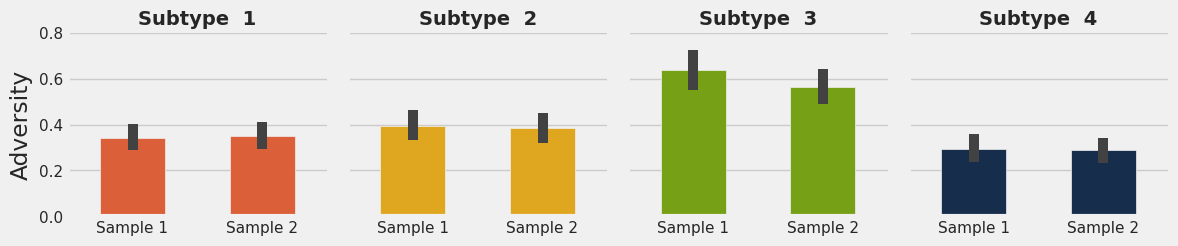

In [22]:
# Rest Adversity
# show_adversity(demos_baseline, sample1_rest_include_idsub, sample2_rest_include_idsub, rest_colors) - [Explanation of what this line does]
show_adversity(demos_baseline, sample1_rest_include_idsub, sample2_rest_include_idsub, rest_colors)

In [23]:
# def get_resids(test, var, formula, pull_vars): - [Explanation of what this line does]
def get_resids(test, var, formula, pull_vars):
    
# test[var] = test[var].astype('float') - [Explanation of what this line does]
    test[var] = test[var].astype('float')
# model = ols(var + formula, data=test).fit() - [Explanation of what this line does]
    model = ols(var + formula, data=test).fit()
    
# test_resid = test[['ID', var] + pull_vars].dropna() - [Explanation of what this line does]
    test_resid = test[['ID', var] + pull_vars].dropna()
                      
# test_resid[var+'_r'] = model.resid - [Explanation of what this line does]
    test_resid[var+'_r'] = model.resid
# test_resid =  test_resid[['ID', var+'_r']] - [Explanation of what this line does]
    test_resid =  test_resid[['ID', var+'_r']]
    
# return test_resid - [Explanation of what this line does]
    return test_resid
                      
# def clean_resids(data, sample): - [Explanation of what this line does]
def clean_resids(data, sample):
# new_data = (pd.concat(data) - [Explanation of what this line does]
    new_data = (pd.concat(data)
# .query('Sample == '+'"'+sample+'"') - [Explanation of what this line does]
            .query('Sample == '+'"'+sample+'"')
# .drop('Sample', axis=1) - [Explanation of what this line does]
            .drop('Sample', axis=1)
# .melt(id_vars='ID') - [Explanation of what this line does]
            .melt(id_vars='ID')
# .dropna() - [Explanation of what this line does]
            .dropna()
# .pivot_table(index='ID', values='value', columns='variable', fill_value='nan') - [Explanation of what this line does]
            .pivot_table(index='ID', values='value', columns='variable', fill_value='nan')
# ) - [Explanation of what this line does]
               )
# new_data['Sample'] = sample - [Explanation of what this line does]
    new_data['Sample'] = sample
    
# new_data['ID'] = new_data.index - [Explanation of what this line does]
    new_data['ID'] = new_data.index
# order = list(new_data.drop(['Sample', 'ID'], axis=1).columns) - [Explanation of what this line does]
    order = list(new_data.drop(['Sample', 'ID'], axis=1).columns)
# new_data = new_data[['ID', 'Sample'] + order].reset_index(drop=True) - [Explanation of what this line does]
    new_data = new_data[['ID', 'Sample'] + order].reset_index(drop=True)
    
# return new_data - [Explanation of what this line does]
    return new_data

# def get_sample_resids(data, df1_idsub, df2_idsub, full_sample_idsub, var_list, resid_formula, pull_vars): - [Explanation of what this line does]
def get_sample_resids(data, df1_idsub, df2_idsub, full_sample_idsub, var_list, resid_formula, pull_vars):
# global new_demos, study_site - [Explanation of what this line does]
    global new_demos, study_site
    
    #full_sample_idsub = pd.concat([df1_idsub, df2_idsub])
    
# r_list = [] - [Explanation of what this line does]
    r_list = []
# for v in var_list: - [Explanation of what this line does]
    for v in var_list:
# for i,j in zip([df1_idsub, df2_idsub, full_sample_idsub], ['Sample1', 'Sample2', 'Full_Sample']): - [Explanation of what this line does]
        for i,j in zip([df1_idsub, df2_idsub, full_sample_idsub], ['Sample1', 'Sample2', 'Full_Sample']):
# test = pd.merge(i, data, on='ID') - [Explanation of what this line does]
                test = pd.merge(i, data, on='ID')
# test = pd.merge(test, new_demos[['ID', 'age','sex_at_birth']], on ='ID') - [Explanation of what this line does]
                test = pd.merge(test, new_demos[['ID', 'age','sex_at_birth']], on ='ID')
# test = pd.merge(test, study_site, on ='ID').drop_duplicates('ID') - [Explanation of what this line does]
                test = pd.merge(test, study_site, on ='ID').drop_duplicates('ID')
# test_resid = get_resids(test, v, resid_formula, pull_vars) - [Explanation of what this line does]
                test_resid = get_resids(test, v, resid_formula, pull_vars)
# test_resid['Sample'] = j - [Explanation of what this line does]
                test_resid['Sample'] = j
# r_list.append(test_resid) - [Explanation of what this line does]
                r_list.append(test_resid)
    
# sample_1_resids = clean_resids(r_list, 'Sample1') - [Explanation of what this line does]
    sample_1_resids = clean_resids(r_list, 'Sample1')
# sample_1_resids = pd.merge(df1_idsub, sample_1_resids, on='ID') - [Explanation of what this line does]
    sample_1_resids = pd.merge(df1_idsub, sample_1_resids, on='ID')
    
# sample_2_resids = clean_resids(r_list, 'Sample2') - [Explanation of what this line does]
    sample_2_resids = clean_resids(r_list, 'Sample2')
# sample_2_resids = pd.merge(df2_idsub, sample_2_resids, on='ID') - [Explanation of what this line does]
    sample_2_resids = pd.merge(df2_idsub, sample_2_resids, on='ID')
    
# full_sample_resids = clean_resids(r_list, 'Full_Sample') - [Explanation of what this line does]
    full_sample_resids = clean_resids(r_list, 'Full_Sample')
# full_sample_resids = pd.merge(full_sample_idsub, full_sample_resids, on='ID') - [Explanation of what this line does]
    full_sample_resids = pd.merge(full_sample_idsub, full_sample_resids, on='ID')
    
# return sample_1_resids, sample_2_resids, full_sample_resids - [Explanation of what this line does]
    return sample_1_resids, sample_2_resids, full_sample_resids


In [24]:
# def std_data(data, std_vars): - [Explanation of what this line does]
def std_data(data, std_vars):
    
# for col in data[std_vars].columns: - [Explanation of what this line does]
    for col in data[std_vars].columns:
# data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0) - [Explanation of what this line does]
        data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)
        
# return data - [Explanation of what this line does]
    return data

In [25]:
# import numpy as np - [Explanation of what this line does]
import numpy as np
# import pandas as pd - [Explanation of what this line does]
import pandas as pd
# import seaborn as sns - [Explanation of what this line does]
import seaborn as sns
# import matplotlib.pyplot as plt - [Explanation of what this line does]
import matplotlib.pyplot as plt

# def sample_pheno_plot(data, sample1, sample2, std_vars, title, ops_cols, save=None): - [Explanation of what this line does]
def sample_pheno_plot(data, sample1, sample2, std_vars, title, ops_cols, save=None):
    # Assuming std_data is a function that standardizes data, it should be defined elsewhere
# sample1 = std_data(pd.merge(sample1, data, on='ID'), std_vars) - [Explanation of what this line does]
    sample1 = std_data(pd.merge(sample1, data, on='ID'), std_vars)
# sample2 = std_data(pd.merge(sample2, data, on='ID'), std_vars) - [Explanation of what this line does]
    sample2 = std_data(pd.merge(sample2, data, on='ID'), std_vars)

# data_r_long = (pd.concat([sample1.assign(Sample='Sample 1'), - [Explanation of what this line does]
    data_r_long = (pd.concat([sample1.assign(Sample='Sample 1'),
# sample2.assign(Sample='Sample 2')]) - [Explanation of what this line does]
                              sample2.assign(Sample='Sample 2')])
# .melt(id_vars=['ID', 'Subtype', 'Sample']) - [Explanation of what this line does]
                   .melt(id_vars=['ID', 'Subtype', 'Sample'])
# .query("variable in @std_vars")) - [Explanation of what this line does]
                   .query("variable in @std_vars"))

# sns.set(rc={'figure.figsize': (5, 5)}) - [Explanation of what this line does]
    sns.set(rc={'figure.figsize': (5, 5)})
# plt.figure(figsize=(5,5)) - [Explanation of what this line does]
    plt.figure(figsize=(5,5))
# sns.set_style("whitegrid") - [Explanation of what this line does]
    sns.set_style("whitegrid")

# g = sns.catplot( - [Explanation of what this line does]
    g = sns.catplot(
# data=data_r_long, - [Explanation of what this line does]
        data=data_r_long,
# x="variable", y="value", col="Sample", hue="Subtype", - [Explanation of what this line does]
        x="variable", y="value", col="Sample", hue="Subtype",
# kind="point", - [Explanation of what this line does]
        kind="point",
# palette=ops_cols, - [Explanation of what this line does]
        palette=ops_cols,
# col_wrap=2, - [Explanation of what this line does]
        col_wrap=2,
# height=6, aspect=2 - [Explanation of what this line does]
        height=6, aspect=2
# ) - [Explanation of what this line does]
    )

# g.fig.suptitle(title, fontsize=20, y=1.01) - [Explanation of what this line does]
    g.fig.suptitle(title, fontsize=20, y=1.01)
# g.set_axis_labels("") - [Explanation of what this line does]
    g.set_axis_labels("")
# g.set_ylabels(label="Residual Z-Score") - [Explanation of what this line does]
    g.set_ylabels(label="Residual Z-Score")
# g.set_xticklabels(rotation=45) - [Explanation of what this line does]
    g.set_xticklabels(rotation=45)
# sns.despine(left=True, bottom=True) - [Explanation of what this line does]
    sns.despine(left=True, bottom=True)

    # Setting y-axis increment of 0.1
    #for ax in g.axes.flat:
    #    min_val, max_val = ax.get_ylim()
    #    ax.set_yticks(np.arange(round(min_val,1)-.1,round(max_val,1)+.1, 0.2))

# for Sample, ax in g.axes_dict.items(): - [Explanation of what this line does]
    for Sample, ax in g.axes_dict.items():
# ax.grid(False, axis='x') - [Explanation of what this line does]
        ax.grid(False, axis='x')
# ax.set_title(Sample) - [Explanation of what this line does]
        ax.set_title(Sample)
# ax.spines['bottom'].set_color('black') - [Explanation of what this line does]
        ax.spines['bottom'].set_color('black')

# x_ticks = np.arange(len(std_vars)) - [Explanation of what this line does]
    x_ticks = np.arange(len(std_vars))
    #plt.xticks(x_ticks, std_vars, rotation=45)
# plt.xticks(x_ticks, rotation=45) - [Explanation of what this line does]
    plt.xticks(x_ticks, rotation=45)

# plt.subplots_adjust(top=0.95) - [Explanation of what this line does]
    plt.subplots_adjust(top=0.95)
# plt.tight_layout() - [Explanation of what this line does]
    plt.tight_layout()

# handles, labels = g.axes[0].get_legend_handles_labels() - [Explanation of what this line does]
    handles, labels = g.axes[0].get_legend_handles_labels()
# g._legend.remove() - [Explanation of what this line does]
    g._legend.remove()
# g.fig.legend(handles, labels, ncol=4, loc='upper left', - [Explanation of what this line does]
    g.fig.legend(handles, labels, ncol=4, loc='upper left',
# bbox_to_anchor=(0.5, 1), frameon=False, - [Explanation of what this line does]
                 bbox_to_anchor=(0.5, 1), frameon=False,
# title="Subtype") - [Explanation of what this line does]
                 title="Subtype")

# if save is not None: - [Explanation of what this line does]
    if save is not None:
# g.savefig('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/pheno_figs/rest/'+title+'_include.png', facecolor='w', dpi=300) - [Explanation of what this line does]
        g.savefig('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/pheno_figs/rest/'+title+'_include.png', facecolor='w', dpi=300)
# plt.clf() - [Explanation of what this line does]
        plt.clf()


In [26]:
# resid_formula = '~ C(abcd_site)' - [Explanation of what this line does]
resid_formula = '~ C(abcd_site)'
# pull_vars = ['abcd_site'] - [Explanation of what this line does]
pull_vars = ['abcd_site']
# rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54'] - [Explanation of what this line does]
rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']

In [27]:
# def sub_pheno_plots(sample1_idsub, sample2_idsub, colors, datatype): - [Explanation of what this line does]
def sub_pheno_plots(sample1_idsub, sample2_idsub, colors, datatype):
    
# global cog_ef_factors, cog_all, beh_all, upps_factors - [Explanation of what this line does]
    global cog_ef_factors, cog_all, beh_all, upps_factors
    
# cog_plot_names = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence'] - [Explanation of what this line does]
    cog_plot_names = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence']
    
# cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID') - [Explanation of what this line does]
    cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID')

# sample_pheno_plot(data = cog_plot_data, - [Explanation of what this line does]
    sample_pheno_plot(data = cog_plot_data,
# sample1 = sample1_idsub, - [Explanation of what this line does]
                      sample1 = sample1_idsub,
# sample2 = sample2_idsub, - [Explanation of what this line does]
                      sample2 = sample2_idsub, 
# std_vars = cog_plot_names, - [Explanation of what this line does]
                      std_vars = cog_plot_names,
# title = f'Cognitive and Executive Functioning', - [Explanation of what this line does]
                      title = f'Cognitive and Executive Functioning', 
# ops_cols = colors, - [Explanation of what this line does]
                      ops_cols = colors, 
# save=None) - [Explanation of what this line does]
                      save=None)

# sample_pheno_plot(data = beh_all, - [Explanation of what this line does]
    sample_pheno_plot(data = beh_all,
# sample1 = sample1_idsub, - [Explanation of what this line does]
                      sample1 = sample1_idsub,
# sample2 = sample2_idsub, - [Explanation of what this line does]
                      sample2 = sample2_idsub, 
# std_vars = beh_all_names, - [Explanation of what this line does]
                      std_vars = beh_all_names,
# title = f'Psychopathology', - [Explanation of what this line does]
                      title = f'Psychopathology', 
# ops_cols = colors, - [Explanation of what this line does]
                      ops_cols = colors, 
# save=None) - [Explanation of what this line does]
                      save=None)

# sample_pheno_plot(data = upps_factors, - [Explanation of what this line does]
    sample_pheno_plot(data = upps_factors,
# sample1 = sample1_idsub, - [Explanation of what this line does]
                      sample1 = sample1_idsub,
# sample2 = sample2_idsub, - [Explanation of what this line does]
                      sample2 = sample2_idsub, 
# std_vars = upps_factors.iloc[:, 1:].columns.to_list(), - [Explanation of what this line does]
                      std_vars = upps_factors.iloc[:, 1:].columns.to_list(), 
# title = f'Impulsivity', - [Explanation of what this line does]
                      title = f'Impulsivity', 
# ops_cols = colors, - [Explanation of what this line does]
                      ops_cols = colors, 
# save=None) - [Explanation of what this line does]
                      save=None)


<Figure size 500x500 with 0 Axes>

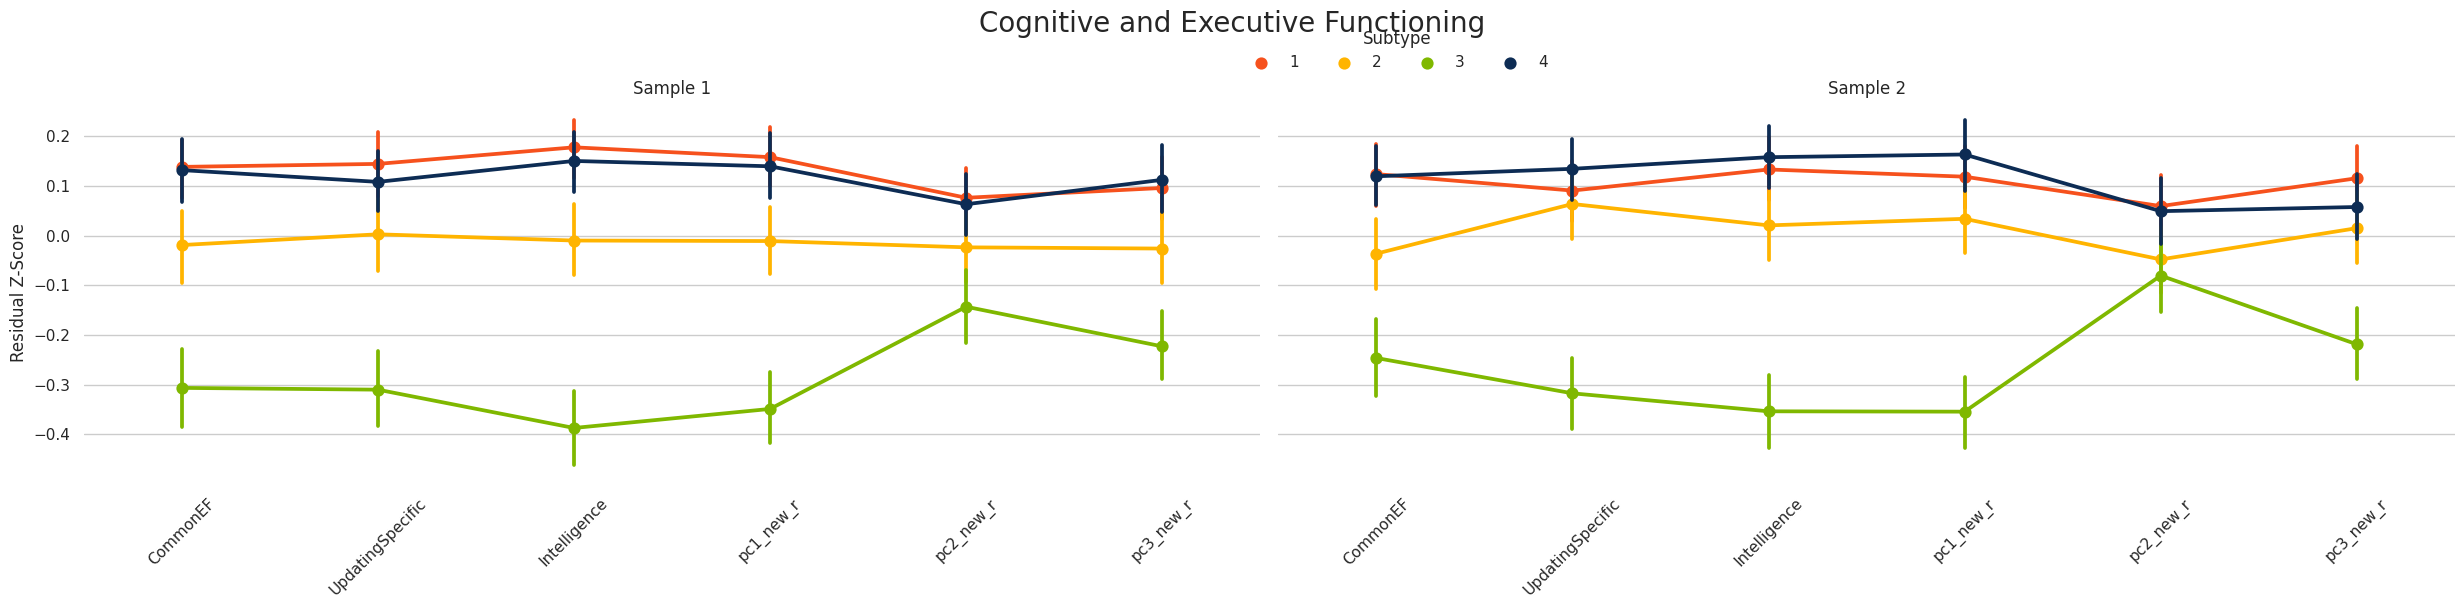

<Figure size 500x500 with 0 Axes>

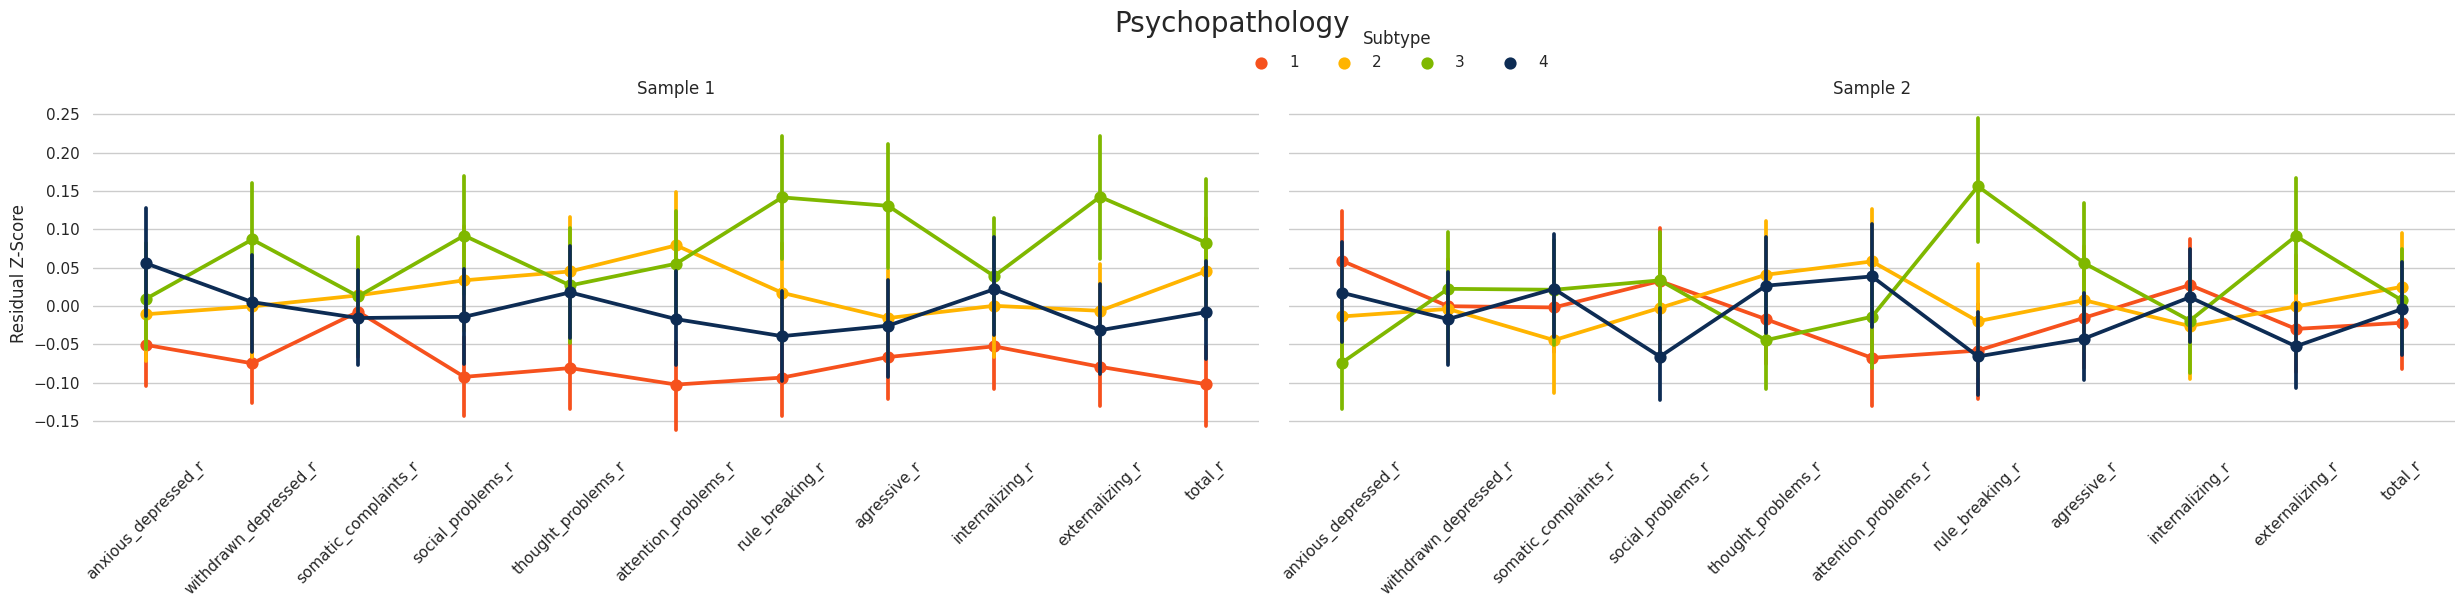

<Figure size 500x500 with 0 Axes>

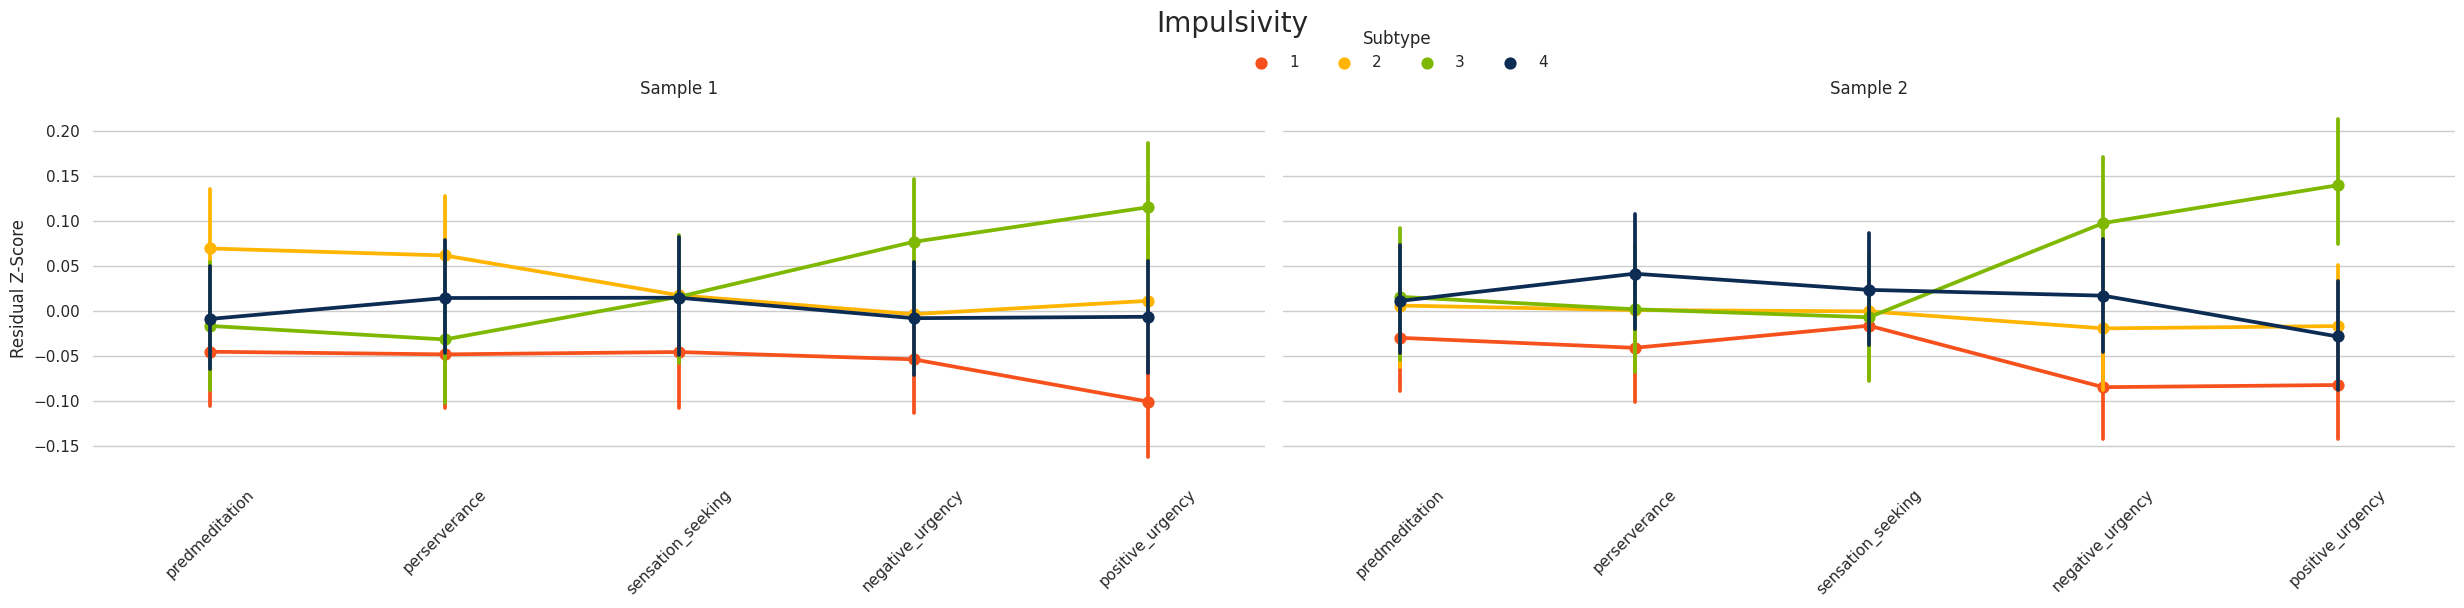

In [28]:
# sub_pheno_plots(sample1_rest_include_idsub, sample2_rest_include_idsub, rest_colors, 'rs-fMRI') - [Explanation of what this line does]
sub_pheno_plots(sample1_rest_include_idsub, sample2_rest_include_idsub, rest_colors, 'rs-fMRI')

In [29]:
# def std_data(data, std_vars): - [Explanation of what this line does]
def std_data(data, std_vars):
    
# for col in data[std_vars].columns: - [Explanation of what this line does]
    for col in data[std_vars].columns:
# data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0) - [Explanation of what this line does]
        data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)
        
# return data - [Explanation of what this line does]
    return data

# def get_stds(data): - [Explanation of what this line does]
def get_stds(data): 
    
# import numpy as np - [Explanation of what this line does]
    import numpy as np
# from scipy import stats - [Explanation of what this line does]
    from scipy import stats

# def confidence_interval(data): - [Explanation of what this line does]
    def confidence_interval(data):
# """Return 95% confidence interval for mean.""" - [Explanation of what this line does]
        """Return 95% confidence interval for mean."""
# mean = np.mean(data) - [Explanation of what this line does]
        mean = np.mean(data)
# ci_low, ci_high = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data)) - [Explanation of what this line does]
        ci_low, ci_high = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data))
# return ci_low, ci_high - [Explanation of what this line does]
        return ci_low, ci_high 


# cis_low_list=[] - [Explanation of what this line does]
    cis_low_list=[]
# cis_high_list=[] - [Explanation of what this line does]
    cis_high_list=[]
# cis_dif_list=[] - [Explanation of what this line does]
    cis_dif_list=[]

# for i in data.Subtype.unique(): - [Explanation of what this line does]
    for i in data.Subtype.unique():

# cis = (data.query('Subtype == @i') - [Explanation of what this line does]
        cis = (data.query('Subtype == @i')
# .apply(lambda x: confidence_interval(x)) - [Explanation of what this line does]
               .apply(lambda x: confidence_interval(x))
# .reset_index() - [Explanation of what this line does]
               .reset_index()
# .iloc[:, 2:].T.rename({0:'low', 1:'high'}, axis=1) - [Explanation of what this line does]
               .iloc[:, 2:].T.rename({0:'low', 1:'high'}, axis=1)
# ) - [Explanation of what this line does]
              )

# cis['dif'] = (cis['high'] - cis['low'])/4 - [Explanation of what this line does]
        cis['dif'] = (cis['high'] - cis['low'])/4

# cis_low_list.append(cis['low'].to_list()) - [Explanation of what this line does]
        cis_low_list.append(cis['low'].to_list())
# cis_high_list.append(cis['high'].to_list()) - [Explanation of what this line does]
        cis_high_list.append(cis['high'].to_list())
# cis_dif_list.append(cis['dif'].to_list()) - [Explanation of what this line does]
        cis_dif_list.append(cis['dif'].to_list())

# cis_low_dict = {i+1: cis_low_list[i] for i in range(len(cis_low_list))} - [Explanation of what this line does]
    cis_low_dict = {i+1: cis_low_list[i] for i in range(len(cis_low_list))}
# cis_high_dict = {i+1: cis_high_list[i] for i in range(len(cis_high_list))} - [Explanation of what this line does]
    cis_high_dict = {i+1: cis_high_list[i] for i in range(len(cis_high_list))}
# stds = {i+1: cis_dif_list[i] for i in range(len(cis_dif_list))} - [Explanation of what this line does]
    stds = {i+1: cis_dif_list[i] for i in range(len(cis_dif_list))}
    
# return stds - [Explanation of what this line does]
    return stds

# def get_means(data): - [Explanation of what this line does]
def get_means(data):
    
# means = data.groupby('Subtype').mean().reset_index().T.iloc[1:] - [Explanation of what this line does]
    means = data.groupby('Subtype').mean().reset_index().T.iloc[1:]
# means.columns = list(range(1, means.shape[1]+1)) - [Explanation of what this line does]
    means.columns = list(range(1, means.shape[1]+1))
# means= {col: means[col].tolist() for col in means.columns} - [Explanation of what this line does]
    means= {col: means[col].tolist() for col in means.columns}
    
# return means - [Explanation of what this line does]
    return means

# def get_means_stds(data): - [Explanation of what this line does]
def get_means_stds(data):
    
# means = get_means(data) - [Explanation of what this line does]
    means = get_means(data)
# stds = get_stds(data) - [Explanation of what this line does]
    stds = get_stds(data)
    
# return means, stds - [Explanation of what this line does]
    return means, stds

# import numpy as np - [Explanation of what this line does]
import numpy as np
# import matplotlib.pyplot as plt - [Explanation of what this line does]
import matplotlib.pyplot as plt


In [30]:
# def radar(plot_data, radar_var, min_val, max_val, num_breaks, save=None): - [Explanation of what this line does]
def radar(plot_data, radar_var, min_val, max_val, num_breaks, save=None):
    
# means, stds = get_means_stds(plot_data) - [Explanation of what this line does]
    means, stds = get_means_stds(plot_data)
# rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54'] - [Explanation of what this line does]
    rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']

# data = { - [Explanation of what this line does]
    data = {
# 'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]}, - [Explanation of what this line does]
        'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]},
# 'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]}, - [Explanation of what this line does]
        'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]},
# 'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]}, - [Explanation of what this line does]
        'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]},
# 'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]} - [Explanation of what this line does]
        'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]}
# } - [Explanation of what this line does]
    }

# import matplotlib.colors - [Explanation of what this line does]
    import matplotlib.colors


# fig = plt.figure(figsize=(10, 10)) - [Explanation of what this line does]
    fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, polar=True) - [Explanation of what this line does]
    ax = fig.add_subplot(111, polar=True)

# angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False) - [Explanation of what this line does]
    angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False)
# angles = np.concatenate((angles, [angles[0]])) - [Explanation of what this line does]
    angles = np.concatenate((angles, [angles[0]]))
# radar_vars.append(radar_vars[0]) - [Explanation of what this line does]
    radar_vars.append(radar_vars[0])

    # Loop through the data dictionary to plot each student's data
# for sub, attributes in data.items(): - [Explanation of what this line does]
    for sub, attributes in data.items():

# scores = attributes['scores'] + [attributes['scores'][0]] - [Explanation of what this line does]
        scores = attributes['scores'] + [attributes['scores'][0]]

# std_dev = attributes['std'] + [attributes['std'][0]/2] - [Explanation of what this line does]
        std_dev = attributes['std'] + [attributes['std'][0]/2]
# std_dev_pos = [sum(x) for x in zip(scores, std_dev)] - [Explanation of what this line does]
        std_dev_pos = [sum(x) for x in zip(scores, std_dev)]
# std_dev_neg = [s - d for s, d in zip(scores, std_dev)] - [Explanation of what this line does]
        std_dev_neg = [s - d for s, d in zip(scores, std_dev)]

# color = attributes['color'] - [Explanation of what this line does]
        color = attributes['color']

# plot = ax.errorbar(angles, scores, - [Explanation of what this line does]
        plot = ax.errorbar(angles, scores, 
# yerr=std_dev, - [Explanation of what this line does]
                           yerr=std_dev, 
# fmt='o-', - [Explanation of what this line does]
                           fmt='o-', 
# color=color, - [Explanation of what this line does]
                           color=color, 
# linewidth=0, - [Explanation of what this line does]
                           linewidth=0, 
# label=sub) - [Explanation of what this line does]
                           label=sub)

# ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub) - [Explanation of what this line does]
        ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub)
# alpha_value = 0.1  # Adjust this value as needed. 1.0 is opaque, 0.0 is transparent. - [Explanation of what this line does]
        alpha_value = 0.1  # Adjust this value as needed. 1.0 is opaque, 0.0 is transparent.
        #ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub)
        # Now, we will fill between the scores and std_dev_pos, and scores and std_dev_neg
# ax.fill_between(angles, scores, std_dev_pos, alpha=alpha_value, color=color, edgecolor='none') - [Explanation of what this line does]
        ax.fill_between(angles, scores, std_dev_pos, alpha=alpha_value, color=color, edgecolor='none')
# ax.fill_between(angles, scores, std_dev_neg, alpha=alpha_value, color=color, edgecolor='none') - [Explanation of what this line does]
        ax.fill_between(angles, scores, std_dev_neg, alpha=alpha_value, color=color, edgecolor='none')

# plot[-1][0].set_color(color) - [Explanation of what this line does]
        plot[-1][0].set_color(color)

# ax.set_facecolor('white') - [Explanation of what this line does]
    ax.set_facecolor('white')
# ax.set_thetagrids(angles * 180 / np.pi, radar_vars) - [Explanation of what this line does]
    ax.set_thetagrids(angles * 180 / np.pi, radar_vars)
# ax.grid(axis='y', color='grey', linewidth=1) - [Explanation of what this line does]
    ax.grid(axis='y', color='grey', linewidth=1)
    # Remove the vertical lines on the radar plot
# ax.spines["polar"].set_visible(False) - [Explanation of what this line does]
    ax.spines["polar"].set_visible(False)
    # Adjust y-ticks to spread them out
# yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed - [Explanation of what this line does]
    yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed
# ax.set_yticks(yticks) - [Explanation of what this line does]
    ax.set_yticks(yticks)
# ax.xaxis.grid(False) - [Explanation of what this line does]
    ax.xaxis.grid(False)
    # Adjust position of radial labels to ensure they don't touch the plot

    # Set the maximum radial value to push the labels outward
    #ax.set_rmax(max_val -.1)  # Adding an offset, adjust this as needed
    # Adjust position of radial labels to ensure they don't touch the plot
# ax.set_rlabel_position(20)  # Adjust the angle as needed. It's reduced to 15 degrees for better placement. - [Explanation of what this line does]
    ax.set_rlabel_position(20)  # Adjust the angle as needed. It's reduced to 15 degrees for better placement.

# plt.tight_layout() - [Explanation of what this line does]
    plt.tight_layout()
    
# if save is not None: - [Explanation of what this line does]
    if save is not None:
# plt.savefig(f'/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/pheno_figs/rest/{save}.png', facecolor='w', dpi=300) - [Explanation of what this line does]
        plt.savefig(f'/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/pheno_figs/rest/{save}.png', facecolor='w', dpi=300)
# plt.clf() - [Explanation of what this line does]
        plt.clf()
        
# else: - [Explanation of what this line does]
    else:
# plt.show() - [Explanation of what this line does]
        plt.show()

In [31]:
# min_val = -.20 - [Explanation of what this line does]
min_val = -.20
# max_val = .20 - [Explanation of what this line does]
max_val = .20
# num_breaks = 5 - [Explanation of what this line does]
num_breaks = 5

# np.linspace(min_val, max_val, num_breaks) - [Explanation of what this line does]
np.linspace(min_val, max_val, num_breaks) 

array([-0.2, -0.1,  0. ,  0.1,  0.2])

In [32]:
# for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub], - [Explanation of what this line does]
for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub],
# ['sample1_rest_include_radar_cbcl', 'sample2_rest_include_radar_cbcl']): - [Explanation of what this line does]
               ['sample1_rest_include_radar_cbcl', 'sample2_rest_include_radar_cbcl']): 
    
# beh_all.iloc[:, 2:12].columns.to_list() - [Explanation of what this line does]
    beh_all.iloc[:, 2:12].columns.to_list()
# data_subs = pd.merge(i, beh_all, on='ID') - [Explanation of what this line does]
    data_subs = pd.merge(i, beh_all, on='ID')
# radar_vars = beh_all.iloc[:, 2:12].columns.to_list() - [Explanation of what this line does]
    radar_vars = beh_all.iloc[:, 2:12].columns.to_list()

# radar_vars = [ - [Explanation of what this line does]
    radar_vars = [
# 'internalizing_r', - [Explanation of what this line does]
         'internalizing_r',
# 'withdrawn_depressed_r', - [Explanation of what this line does]
         'withdrawn_depressed_r',
# 'somatic_complaints_r', - [Explanation of what this line does]
         'somatic_complaints_r',
# 'social_problems_r', - [Explanation of what this line does]
         'social_problems_r',
# 'thought_problems_r', - [Explanation of what this line does]
         'thought_problems_r',
# 'attention_problems_r', - [Explanation of what this line does]
         'attention_problems_r',
# 'rule_breaking_r', - [Explanation of what this line does]
         'rule_breaking_r',
# 'agressive_r', - [Explanation of what this line does]
         'agressive_r',
# 'externalizing_r', - [Explanation of what this line does]
         'externalizing_r',
# 'total_r'] - [Explanation of what this line does]
         'total_r']
    
# sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars) - [Explanation of what this line does]
    sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars)

# radar(sample, radar_vars, min_val = -.20, max_val = .20, num_breaks = 5, save=j) - [Explanation of what this line does]
    radar(sample, radar_vars, min_val = -.20, max_val = .20, num_breaks = 5, save=j)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [33]:
# min_val = -.60 - [Explanation of what this line does]
min_val = -.60
# max_val = .2 - [Explanation of what this line does]
max_val = .2
# num_breaks = 5 - [Explanation of what this line does]
num_breaks = 5

# np.linspace(min_val, max_val, num_breaks).round(3) - [Explanation of what this line does]
np.linspace(min_val, max_val, num_breaks).round(3)

array([-0.6, -0.4, -0.2,  0. ,  0.2])

In [34]:
# ef_vars = list(cog_ef_factors.iloc[:, 1:].columns) + ['LMT_r', 'RAVLT_r'] - [Explanation of what this line does]
ef_vars = list(cog_ef_factors.iloc[:, 1:].columns) + ['LMT_r', 'RAVLT_r']
# cog_ef_all = pd.merge(cog_ef_factors, cog_all, on = ['ID'])[['ID'] + ef_vars] - [Explanation of what this line does]
cog_ef_all = pd.merge(cog_ef_factors, cog_all, on = ['ID'])[['ID'] + ef_vars]

In [35]:
# for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub], - [Explanation of what this line does]
for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub],
# ['sample1_rest_include_radar_cogef', 'sample2_rest_include_radar_cogef']): - [Explanation of what this line does]
               ['sample1_rest_include_radar_cogef', 'sample2_rest_include_radar_cogef']): 
    
# cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID') - [Explanation of what this line does]
    cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID')
# data_subs = pd.merge(i,cog_plot_data, on='ID') - [Explanation of what this line does]
    data_subs = pd.merge(i,cog_plot_data, on='ID')
# radar_vars = ['CommonEF', 'UpdatingSpecific', 'Intelligence', 'LMT_r', 'RAVLT_r'] - [Explanation of what this line does]
    radar_vars = ['CommonEF', 'UpdatingSpecific', 'Intelligence', 'LMT_r', 'RAVLT_r']
# sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars) - [Explanation of what this line does]
    sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars)

# radar(sample, radar_vars, min_val = -.4, max_val = .2, num_breaks = 5, save=j) - [Explanation of what this line does]
    radar(sample, radar_vars, min_val = -.4, max_val = .2, num_breaks = 5, save=j)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [36]:
# for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub], - [Explanation of what this line does]
for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub],
# ['sample1_rest_include_radar_upps', 'sample2_rest_include_radar_upps']): - [Explanation of what this line does]
               ['sample1_rest_include_radar_upps', 'sample2_rest_include_radar_upps']):
    
# data_subs = pd.merge(i,upps_factors, on='ID') - [Explanation of what this line does]
    data_subs = pd.merge(i,upps_factors, on='ID')
# radar_vars = ['predmeditation', 'perserverance', 'sensation_seeking','negative_urgency', 'positive_urgency'] - [Explanation of what this line does]
    radar_vars = ['predmeditation', 'perserverance', 'sensation_seeking','negative_urgency', 'positive_urgency']
# sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars) - [Explanation of what this line does]
    sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars)
    
# radar(sample, radar_vars, min_val = -.15, max_val = .15, num_breaks = 6, save=j) - [Explanation of what this line does]
    radar(sample, radar_vars, min_val = -.15, max_val = .15, num_breaks = 6, save=j)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [37]:
# for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub], - [Explanation of what this line does]
for i,j in zip([sample1_rest_include_idsub, sample2_rest_include_idsub],
# ['sample1_rest_include_radar_upps', 'sample2_rest_include_radar_upps']): - [Explanation of what this line does]
               ['sample1_rest_include_radar_upps', 'sample2_rest_include_radar_upps']):
    
# data_subs = pd.merge(i,stroop_beh, on='ID') - [Explanation of what this line does]
    data_subs = pd.merge(i,stroop_beh, on='ID')
# radar_vars = ['Stroop_interf_acc_all_r','Happy_Acc_Eq_r','Angry_Acc_Eq_r'] - [Explanation of what this line does]
    radar_vars = ['Stroop_interf_acc_all_r','Happy_Acc_Eq_r','Angry_Acc_Eq_r']
# sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars) - [Explanation of what this line does]
    sample = std_data(data_subs[['Subtype'] + radar_vars], radar_vars)

# radar(sample, radar_vars, min_val = -.15, max_val = .15, num_breaks = 6, save=j) - [Explanation of what this line does]
    radar(sample, radar_vars, min_val = -.15, max_val = .15, num_breaks = 6, save=j)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

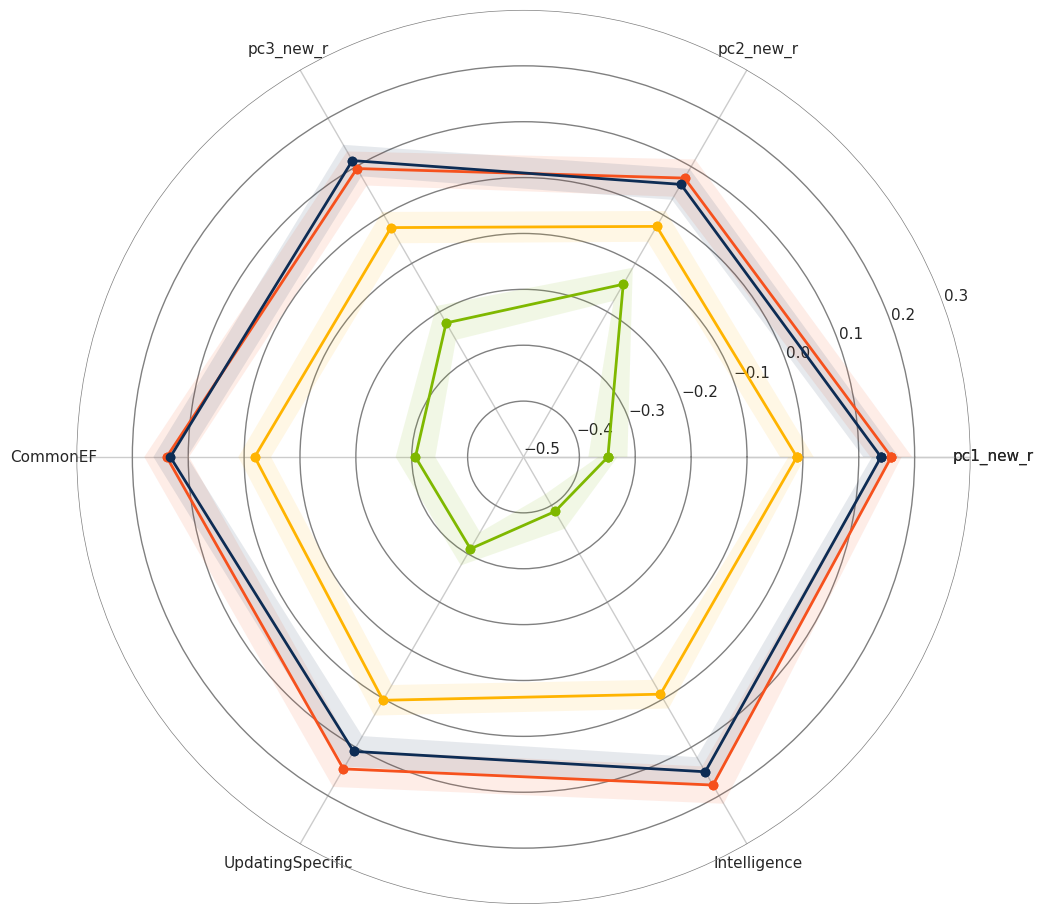

In [38]:
# cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID') - [Explanation of what this line does]
cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID')
# data_subs = pd.merge(sample1_rest_include_idsub,cog_plot_data, on='ID') - [Explanation of what this line does]
data_subs = pd.merge(sample1_rest_include_idsub,cog_plot_data, on='ID')
# radar_vars = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence'] - [Explanation of what this line does]
radar_vars = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence']
# sample1 = data_subs[['Subtype'] + radar_vars] - [Explanation of what this line does]
sample1 = data_subs[['Subtype'] + radar_vars]
# sample1 = std_data(sample1, radar_vars) - [Explanation of what this line does]
sample1 = std_data(sample1, radar_vars)

# means, stds = get_means_stds(sample1) - [Explanation of what this line does]
means, stds = get_means_stds(sample1)
# rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54'] - [Explanation of what this line does]
rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']

# data = { - [Explanation of what this line does]
data = {
# 'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]}, - [Explanation of what this line does]
    'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]},
# 'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]}, - [Explanation of what this line does]
    'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]},
# 'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]}, - [Explanation of what this line does]
    'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]},
# 'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]} - [Explanation of what this line does]
    'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]}
# } - [Explanation of what this line does]
}

# import matplotlib.colors - [Explanation of what this line does]
import matplotlib.colors

# min_val = -.5 - [Explanation of what this line does]
min_val = -.5
# max_val = .4 - [Explanation of what this line does]
max_val = .4
# num_breaks = 10 - [Explanation of what this line does]
num_breaks = 10

# fig = plt.figure(figsize=(10, 10)) - [Explanation of what this line does]
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, polar=True) - [Explanation of what this line does]
ax = fig.add_subplot(111, polar=True)

# angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False) - [Explanation of what this line does]
angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False)
# angles = np.concatenate((angles, [angles[0]])) - [Explanation of what this line does]
angles = np.concatenate((angles, [angles[0]]))
# radar_vars.append(radar_vars[0]) - [Explanation of what this line does]
radar_vars.append(radar_vars[0])

# Loop through the data dictionary to plot each student's data
# for sub, attributes in data.items(): - [Explanation of what this line does]
for sub, attributes in data.items():
    
# scores = attributes['scores'] + [attributes['scores'][0]] - [Explanation of what this line does]
    scores = attributes['scores'] + [attributes['scores'][0]]
    
# std_dev = attributes['std'] + [attributes['std'][0]/2] - [Explanation of what this line does]
    std_dev = attributes['std'] + [attributes['std'][0]/2]
# std_dev_pos = [sum(x) for x in zip(scores, std_dev)] - [Explanation of what this line does]
    std_dev_pos = [sum(x) for x in zip(scores, std_dev)]
# std_dev_neg = [s - d for s, d in zip(scores, std_dev)] - [Explanation of what this line does]
    std_dev_neg = [s - d for s, d in zip(scores, std_dev)]
    
# color = attributes['color'] - [Explanation of what this line does]
    color = attributes['color']
    
# plot = ax.errorbar(angles, scores, - [Explanation of what this line does]
    plot = ax.errorbar(angles, scores, 
# yerr=std_dev, - [Explanation of what this line does]
                       yerr=std_dev, 
# fmt='o-', - [Explanation of what this line does]
                       fmt='o-', 
# color=color, - [Explanation of what this line does]
                       color=color, 
# linewidth=0, - [Explanation of what this line does]
                       linewidth=0, 
# label=sub) - [Explanation of what this line does]
                       label=sub)
    
# ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub) - [Explanation of what this line does]
    ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub)
# alpha_value = 0.1  # Adjust this value as needed. 1.0 is opaque, 0.0 is transparent. - [Explanation of what this line does]
    alpha_value = 0.1  # Adjust this value as needed. 1.0 is opaque, 0.0 is transparent.
    #ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub)
    # Now, we will fill between the scores and std_dev_pos, and scores and std_dev_neg
# ax.fill_between(angles, scores, std_dev_pos, alpha=alpha_value, color=color, edgecolor='none') - [Explanation of what this line does]
    ax.fill_between(angles, scores, std_dev_pos, alpha=alpha_value, color=color, edgecolor='none')
# ax.fill_between(angles, scores, std_dev_neg, alpha=alpha_value, color=color, edgecolor='none') - [Explanation of what this line does]
    ax.fill_between(angles, scores, std_dev_neg, alpha=alpha_value, color=color, edgecolor='none')
    
# plot[-1][0].set_color(color) - [Explanation of what this line does]
    plot[-1][0].set_color(color)

# ax.set_facecolor('white') - [Explanation of what this line does]
ax.set_facecolor('white')
# ax.set_thetagrids(angles * 180 / np.pi, radar_vars) - [Explanation of what this line does]
ax.set_thetagrids(angles * 180 / np.pi, radar_vars)
# ax.grid(axis='y', color='grey', linewidth=1) - [Explanation of what this line does]
ax.grid(axis='y', color='grey', linewidth=1)
# Remove the vertical lines on the radar plot
# ax.spines["polar"].set_visible(False) - [Explanation of what this line does]
ax.spines["polar"].set_visible(False)
# Adjust y-ticks to spread them out
# yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed - [Explanation of what this line does]
yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed
# ax.set_yticks(yticks) - [Explanation of what this line does]
ax.set_yticks(yticks)
#ax.xaxis.grid(False)
# Adjust position of radial labels to ensure they don't touch the plot
# ax.set_rlabel_position(30)  # 30 is the angle in degrees. Adjust as needed. - [Explanation of what this line does]
ax.set_rlabel_position(30)  # 30 is the angle in degrees. Adjust as needed.

# Set the maximum radial value to push the labels outward
# ax.set_rmax(max_val -.1)  # Adding an offset, adjust this as needed - [Explanation of what this line does]
ax.set_rmax(max_val -.1)  # Adding an offset, adjust this as needed
# Adjust position of radial labels to ensure they don't touch the plot
# ax.set_rlabel_position(20)  # Adjust the angle as needed. It's reduced to 15 degrees for better placement. - [Explanation of what this line does]
ax.set_rlabel_position(20)  # Adjust the angle as needed. It's reduced to 15 degrees for better placement.


# plt.tight_layout() - [Explanation of what this line does]
plt.tight_layout()
# plt.show() - [Explanation of what this line does]
plt.show()

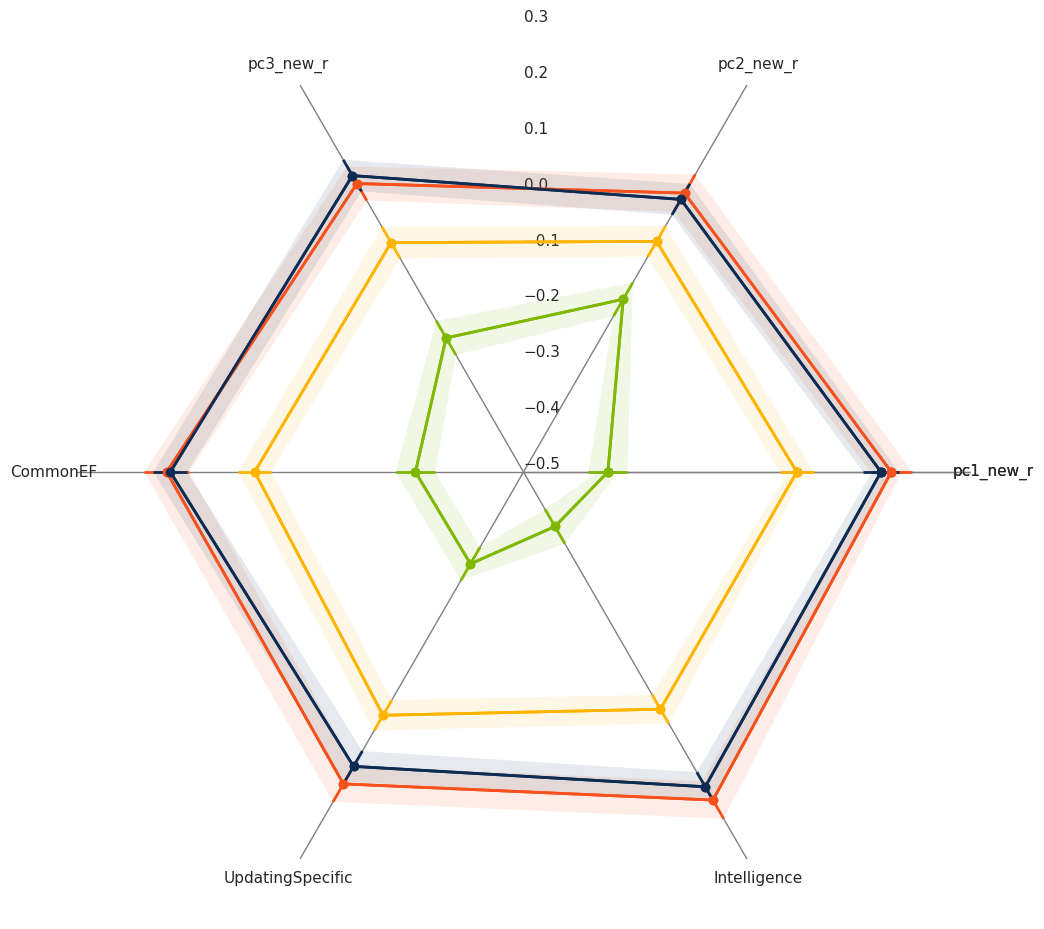

In [39]:
# cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID') - [Explanation of what this line does]
cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID')
# data_subs = pd.merge(sample1_rest_include_idsub,cog_plot_data, on='ID') - [Explanation of what this line does]
data_subs = pd.merge(sample1_rest_include_idsub,cog_plot_data, on='ID')
# radar_vars = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence'] - [Explanation of what this line does]
radar_vars = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence']
# sample1 = data_subs[['Subtype'] + radar_vars] - [Explanation of what this line does]
sample1 = data_subs[['Subtype'] + radar_vars]
# sample1 = std_data(sample1, radar_vars) - [Explanation of what this line does]
sample1 = std_data(sample1, radar_vars)

# means, stds = get_means_stds(sample1) - [Explanation of what this line does]
means, stds = get_means_stds(sample1)
# rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54'] - [Explanation of what this line does]
rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']

# data = { - [Explanation of what this line does]
data = {
# 'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]}, - [Explanation of what this line does]
    'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]},
# 'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]}, - [Explanation of what this line does]
    'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]},
# 'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]}, - [Explanation of what this line does]
    'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]},
# 'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]} - [Explanation of what this line does]
    'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]}
# } - [Explanation of what this line does]
}


# import matplotlib.colors - [Explanation of what this line does]
import matplotlib.colors

# min_val = -.5 - [Explanation of what this line does]
min_val = -.5
# max_val = .4 - [Explanation of what this line does]
max_val = .4
# num_breaks = 10 - [Explanation of what this line does]
num_breaks = 10

# angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False) - [Explanation of what this line does]
angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False)
# angles = np.concatenate((angles, [angles[0]])) - [Explanation of what this line does]
angles = np.concatenate((angles, [angles[0]]))
# radar_vars.append(radar_vars[0]) - [Explanation of what this line does]
radar_vars.append(radar_vars[0])

# fig = plt.figure(figsize=(10, 10)) - [Explanation of what this line does]
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, polar=True) - [Explanation of what this line does]
ax = fig.add_subplot(111, polar=True)

# Loop through the data dictionary to plot each student's data
# for sub, attributes in data.items(): - [Explanation of what this line does]
for sub, attributes in data.items():
# scores = attributes['scores'] + [attributes['scores'][0]] - [Explanation of what this line does]
    scores = attributes['scores'] + [attributes['scores'][0]]
# std_dev = attributes['std'] + [attributes['std'][0]/2] - [Explanation of what this line does]
    std_dev = attributes['std'] + [attributes['std'][0]/2]
# std_dev_pos = [sum(x) for x in zip(scores, std_dev)] - [Explanation of what this line does]
    std_dev_pos = [sum(x) for x in zip(scores, std_dev)]
# std_dev_neg = [s - d for s, d in zip(scores, std_dev)] - [Explanation of what this line does]
    std_dev_neg = [s - d for s, d in zip(scores, std_dev)]
# color = attributes['color'] - [Explanation of what this line does]
    color = attributes['color']
    
# plot = ax.errorbar(angles, scores, yerr=std_dev, fmt='o-', - [Explanation of what this line does]
    plot = ax.errorbar(angles, scores, yerr=std_dev, fmt='o-', 
# color=color, linewidth=2, label=sub) - [Explanation of what this line does]
                       color=color, linewidth=2, label=sub)
    
# alpha_value = 0.1  # Adjust this value as needed. 1.0 is opaque, 0.0 is transparent. - [Explanation of what this line does]
    alpha_value = 0.1  # Adjust this value as needed. 1.0 is opaque, 0.0 is transparent.
# ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub) - [Explanation of what this line does]
    ax.plot(angles, scores, 'o-', color=color, linewidth=2, label=sub)
    # Now, we will fill between the scores and std_dev_pos, and scores and std_dev_neg
# ax.fill_between(angles, scores, std_dev_pos, alpha=alpha_value, color=color, edgecolor='none') - [Explanation of what this line does]
    ax.fill_between(angles, scores, std_dev_pos, alpha=alpha_value, color=color, edgecolor='none')
# ax.fill_between(angles, scores, std_dev_neg, alpha=alpha_value, color=color, edgecolor='none') - [Explanation of what this line does]
    ax.fill_between(angles, scores, std_dev_neg, alpha=alpha_value, color=color, edgecolor='none')
    
# plot[-1][0].set_color(color) - [Explanation of what this line does]
    plot[-1][0].set_color(color)

# ax.set_facecolor('white') - [Explanation of what this line does]
ax.set_facecolor('white')
# ax.set_thetagrids(angles * 180 / np.pi, radar_vars) - [Explanation of what this line does]
ax.set_thetagrids(angles * 180 / np.pi, radar_vars)
# ax.grid(axis='x', color='grey', linewidth=1) - [Explanation of what this line does]
ax.grid(axis='x', color='grey', linewidth=1)
# Remove the vertical lines on the radar plot
# ax.spines["polar"].set_visible(False) - [Explanation of what this line does]
ax.spines["polar"].set_visible(False)
# Adjust y-ticks to spread them out
# yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed - [Explanation of what this line does]
yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed
# ax.set_yticks(yticks) - [Explanation of what this line does]
ax.set_yticks(yticks)
# ax.yaxis.grid(False) - [Explanation of what this line does]
ax.yaxis.grid(False)

# Set the maximum radial value to push the labels outward
# ax.set_rmax(max_val -.1)  # Adding an offset, adjust this as needed - [Explanation of what this line does]
ax.set_rmax(max_val -.1)  # Adding an offset, adjust this as needed
# Adjust position of radial labels to ensure they don't touch the plot
# ax.set_rlabel_position(90)  # Adjust the angle as needed. It's reduced to 15 degrees for better placement. - [Explanation of what this line does]
ax.set_rlabel_position(90)  # Adjust the angle as needed. It's reduced to 15 degrees for better placement.

# plt.tight_layout() - [Explanation of what this line does]
plt.tight_layout()
# plt.show() - [Explanation of what this line does]
plt.show()

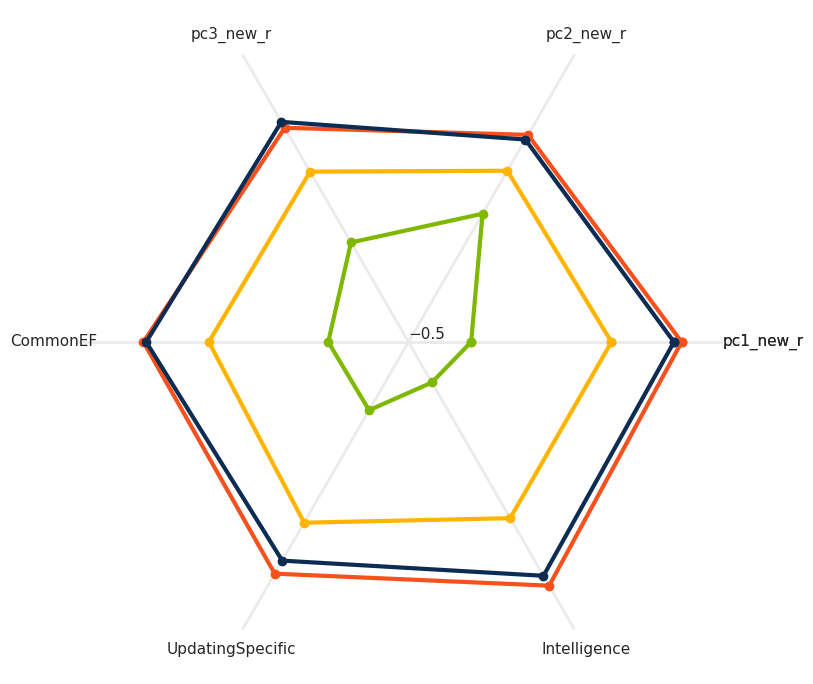

In [40]:
# cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID') - [Explanation of what this line does]
cog_plot_data = pd.merge(cog_ef_factors, cog_all, on ='ID')
# data_subs = pd.merge(sample1_rest_include_idsub,cog_plot_data, on='ID') - [Explanation of what this line does]
data_subs = pd.merge(sample1_rest_include_idsub,cog_plot_data, on='ID')
# radar_vars = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence'] - [Explanation of what this line does]
radar_vars = ['pc1_new_r','pc2_new_r','pc3_new_r','CommonEF', 'UpdatingSpecific', 'Intelligence']
# sample1 = data_subs[['Subtype'] + radar_vars] - [Explanation of what this line does]
sample1 = data_subs[['Subtype'] + radar_vars]
# sample1 = std_data(sample1, radar_vars) - [Explanation of what this line does]
sample1 = std_data(sample1, radar_vars)

# means, stds = get_means_stds(sample1) - [Explanation of what this line does]
means, stds = get_means_stds(sample1)
# rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54'] - [Explanation of what this line does]
rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']

# data = { - [Explanation of what this line does]
data = {
# 'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]}, - [Explanation of what this line does]
    'Subtype 1': {'scores': means[1], 'std': stds[1], 'color': rest_colors[0]},
# 'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]}, - [Explanation of what this line does]
    'Subtype 2': {'scores': means[2], 'std': stds[2], 'color': rest_colors[1]},
# 'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]}, - [Explanation of what this line does]
    'Subtype 3': {'scores': means[3], 'std': stds[3], 'color': rest_colors[2]},
# 'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]} - [Explanation of what this line does]
    'Subtype 4': {'scores': means[4], 'std': stds[4], 'color': rest_colors[3]}
# } - [Explanation of what this line does]
}

# angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False) - [Explanation of what this line does]
angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False)
# angles = np.concatenate((angles, [angles[0]])) - [Explanation of what this line does]
angles = np.concatenate((angles, [angles[0]]))
# radar_vars.append(radar_vars[0]) - [Explanation of what this line does]
radar_vars.append(radar_vars[0])

# fig = plt.figure(figsize=(10, 7)) - [Explanation of what this line does]
fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, polar=True) - [Explanation of what this line does]
ax = fig.add_subplot(111, polar=True)

# Loop through the data dictionary to plot each student's data
# for sub, attributes in data.items(): - [Explanation of what this line does]
for sub, attributes in data.items():
# scores = attributes['scores'] + [attributes['scores'][0]] - [Explanation of what this line does]
    scores = attributes['scores'] + [attributes['scores'][0]]
# color = attributes['color'] - [Explanation of what this line does]
    color = attributes['color']
    
# ax.plot(angles, scores, '-o', color=color, linewidth=3) - [Explanation of what this line does]
    ax.plot(angles, scores, '-o', color=color, linewidth=3)

# ax.set_facecolor('white') - [Explanation of what this line does]
ax.set_facecolor('white')
# ax.set_thetagrids(angles * 180 / np.pi, radar_vars) - [Explanation of what this line does]
ax.set_thetagrids(angles * 180 / np.pi, radar_vars)

# ax.grid(axis='x', color='#EBEBEB', linewidth=2) - [Explanation of what this line does]
ax.grid(axis='x', color='#EBEBEB', linewidth=2)
# Remove the vertical lines on the radar plot
# ax.spines["polar"].set_visible(False) - [Explanation of what this line does]
ax.spines["polar"].set_visible(False)

# min_val = -.5 - [Explanation of what this line does]
min_val = -.5
# max_val = .4 - [Explanation of what this line does]
max_val = .4
# num_breaks = 2 - [Explanation of what this line does]
num_breaks = 2

# Adjust y-ticks to spread them out
# yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed - [Explanation of what this line does]
yticks = np.linspace(min_val, max_val, num_breaks)  # adjust min_val, max_val, num_breaks as needed
# yticks = np.round(yticks, 1)  # round each value to the nearest 0.1 - [Explanation of what this line does]
yticks = np.round(yticks, 1)  # round each value to the nearest 0.1
# ax.set_yticks(yticks) - [Explanation of what this line does]
ax.set_yticks(yticks)
# ax.yaxis.grid(False) - [Explanation of what this line does]
ax.yaxis.grid(False)
# Adjust position of radial labels to ensure they don't touch the plot
# ax.set_rlabel_position(30)  # 30 is the angle in degrees. Adjust as needed. - [Explanation of what this line does]
ax.set_rlabel_position(30)  # 30 is the angle in degrees. Adjust as needed.

# ax.set_rmax(max_val -.1) - [Explanation of what this line does]
ax.set_rmax(max_val -.1) 

# plt.tight_layout() - [Explanation of what this line does]
plt.tight_layout()
# plt.show() - [Explanation of what this line does]
plt.show()